Connected to randomnwn (Python 3.8.17)

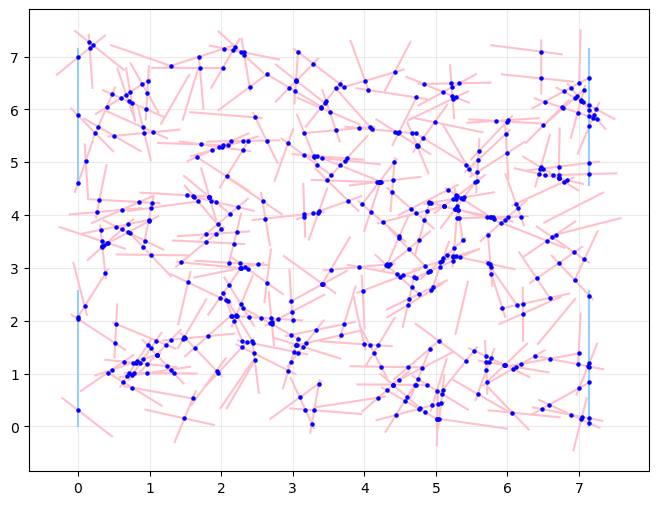

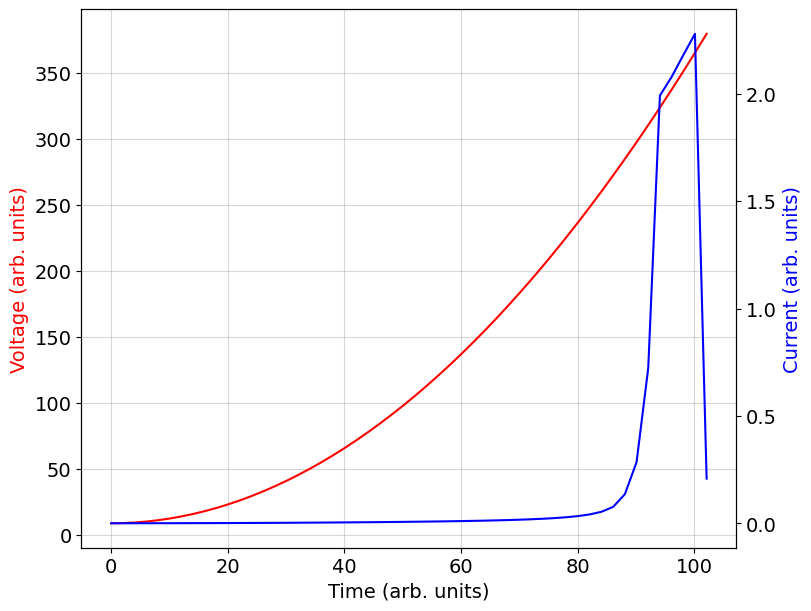

In [1]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")
rnwn.plot_NWN(NWN)

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():
V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

In [2]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")
rnwn.plot_NWN(NWN)

# V = [voltage_func(t) for t in sol.t]
# I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
# R = V / I

# font = 14
# fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

# ax1.plot(sol.t, V, "red")
# ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
# ax1.set_xlabel("Time (arb. units)", fontsize=font)
# ax1.tick_params(labelsize=font, which="both")

# ax2 = ax1.twinx()
# ax2.plot(sol.t, I, "blue")
# ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
# ax2.tick_params(labelsize=font, which="both")

# ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:201: RuntimeWarning: overflow encountered in multiply
  dw_dt = (l - ((w - epsilon) / tau)) * window_func(w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:202: RuntimeWarning: invalid value encountered in multiply
  dtau_dt = theta * l * (a - w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:203: RuntimeWarning: invalid value encountered in multiply
  deps_dt = sigma * l * window_func(w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:276: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


No kernel connected

Connected to randomnwn (Python 3.8.17)

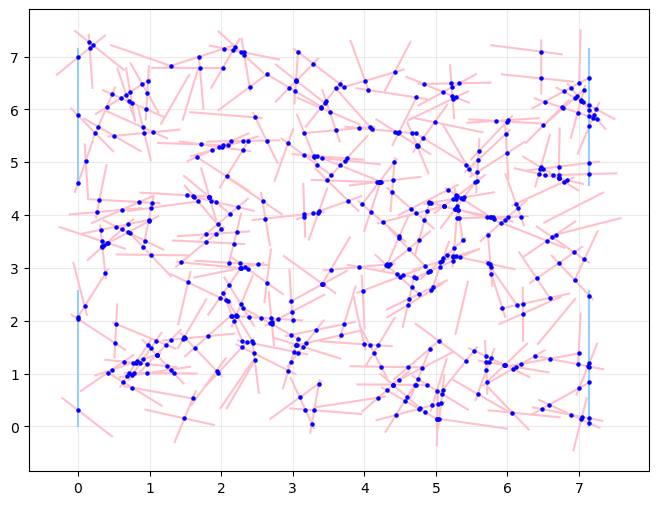

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [2]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")
rnwn.plot_NWN(NWN)

# V = [voltage_func(t) for t in sol.t]
# I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
# R = V / I

# font = 14
# fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

# ax1.plot(sol.t, V, "red")
# ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
# ax1.set_xlabel("Time (arb. units)", fontsize=font)
# ax1.tick_params(labelsize=font, which="both")

# ax2 = ax1.twinx()
# ax2.plot(sol.t, I, "blue")
# ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
# ax2.tick_params(labelsize=font, which="both")

# ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

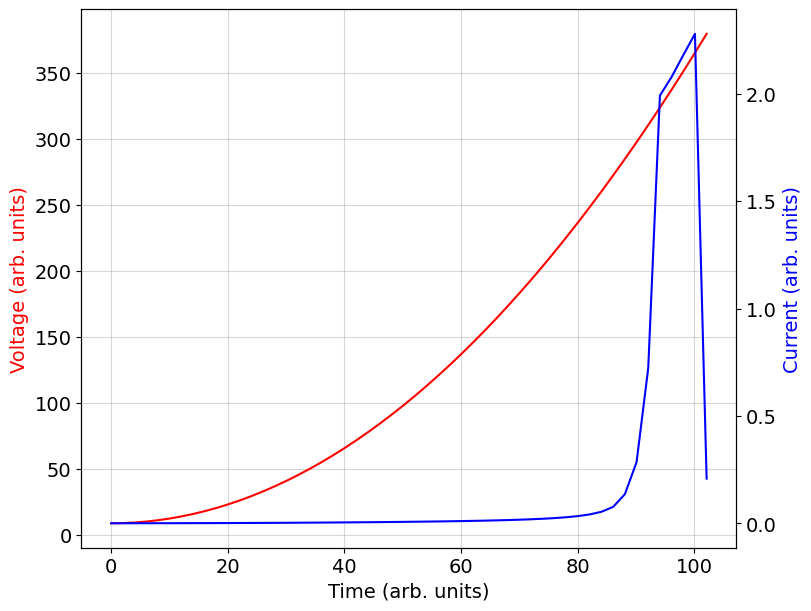

In [3]:
V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

In [4]:
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

In [5]:
def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

In [7]:
def voltage_func(t):
    V0 = 18
    T = 666
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

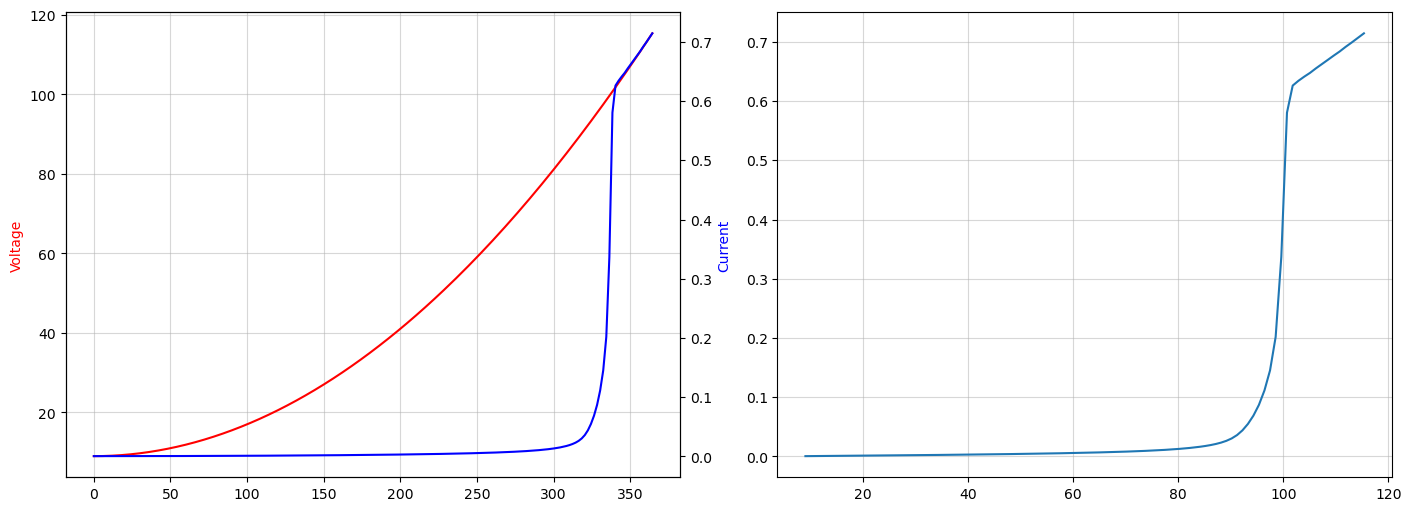

In [8]:
V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)
ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage", color="red")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current", color="blue")

ax1.grid(alpha=0.5)

ax3.plot(V, I)
ax3.grid(alpha=0.5)

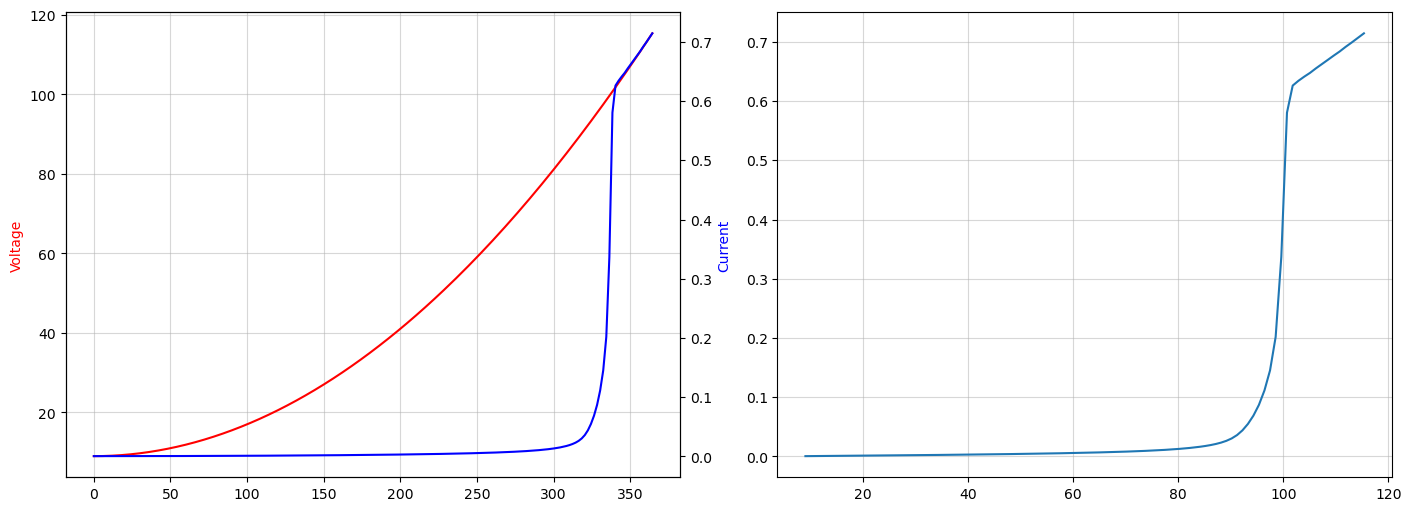

In [9]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)
ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage", color="red")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current", color="blue")

ax1.grid(alpha=0.5)

ax3.plot(V, I)
ax3.grid(alpha=0.5)

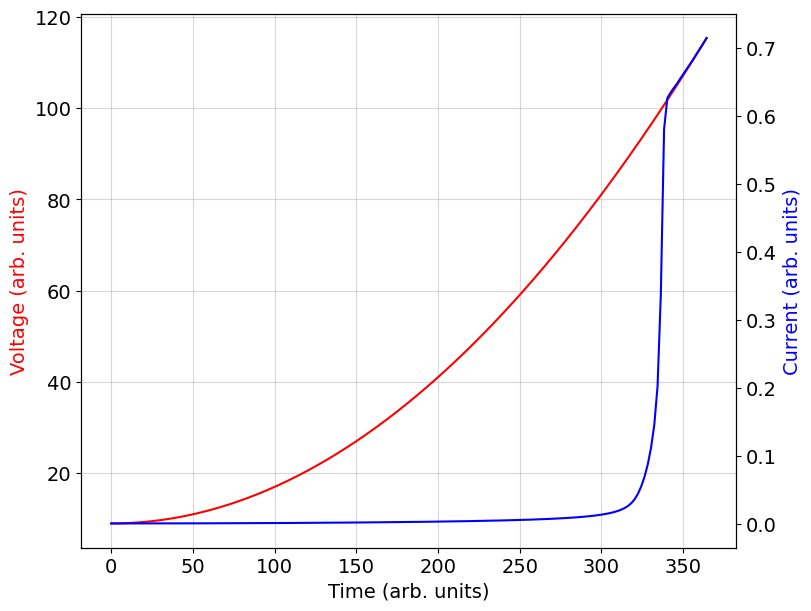

In [10]:
font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

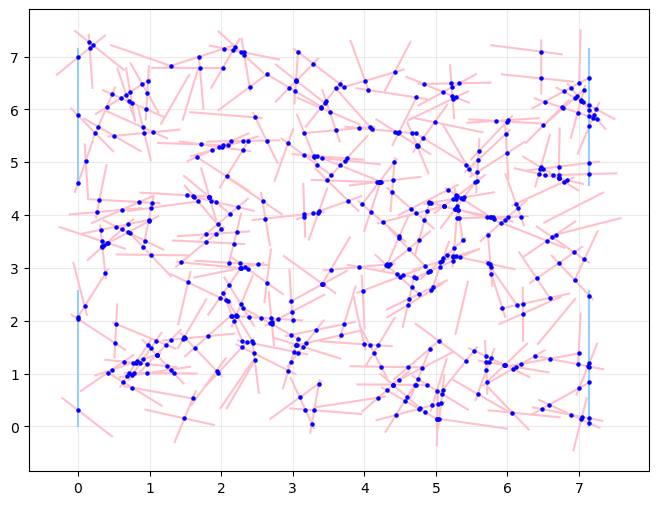

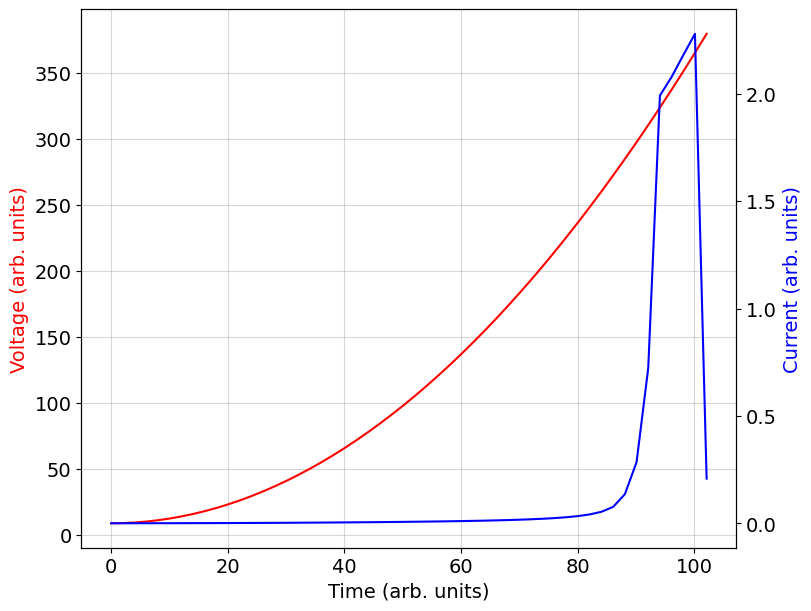

In [15]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")
rnwn.plot_NWN(NWN)

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

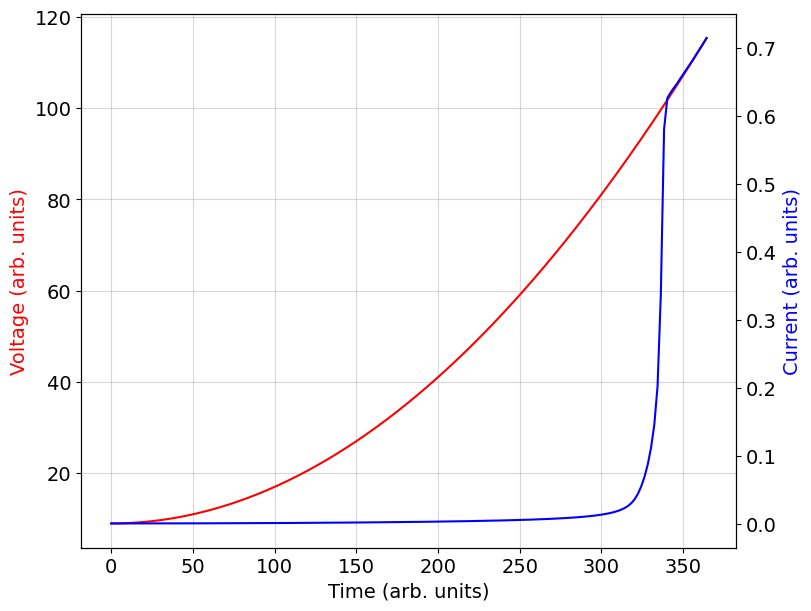

In [16]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 666
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

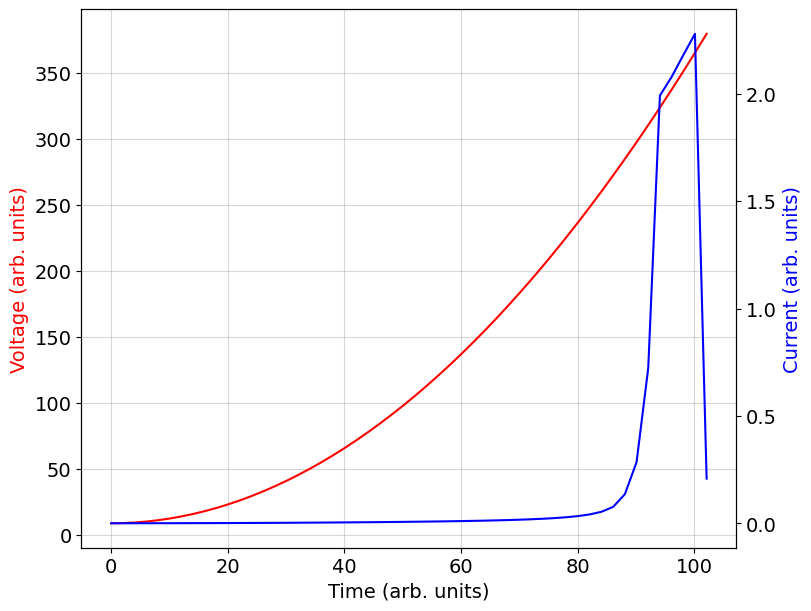

In [18]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

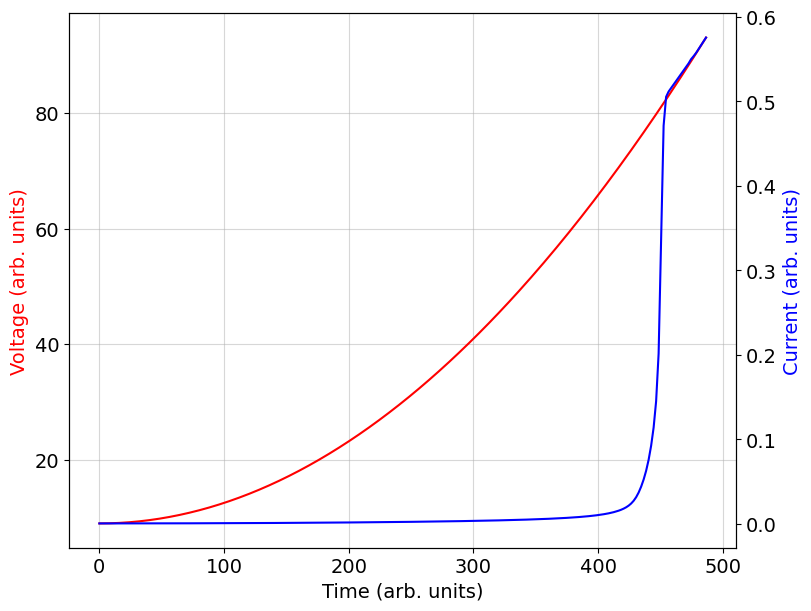

In [19]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 1000
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

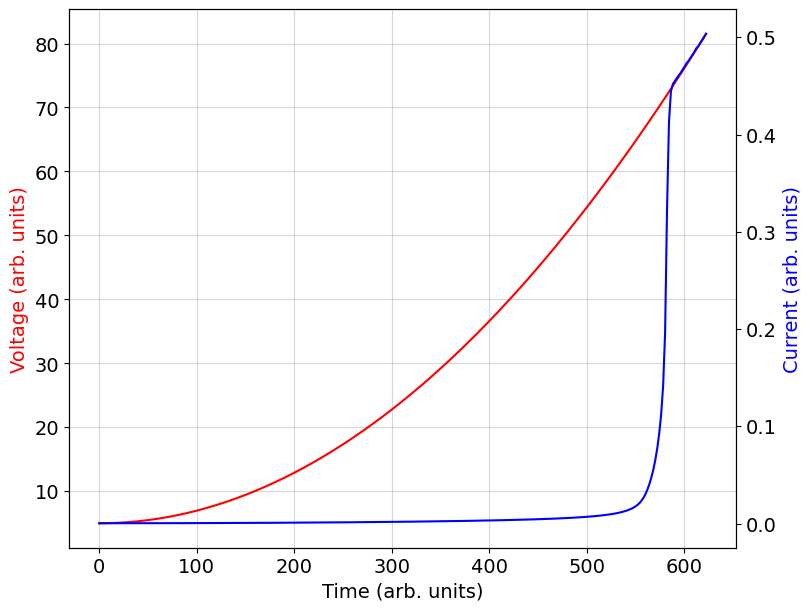

In [20]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 10
    T = 1000
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

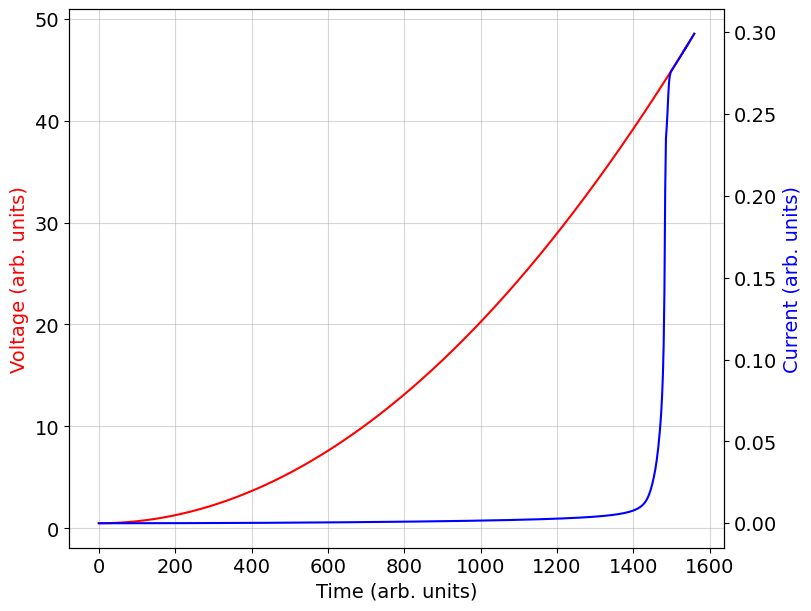

In [21]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 1
    T = 1000
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

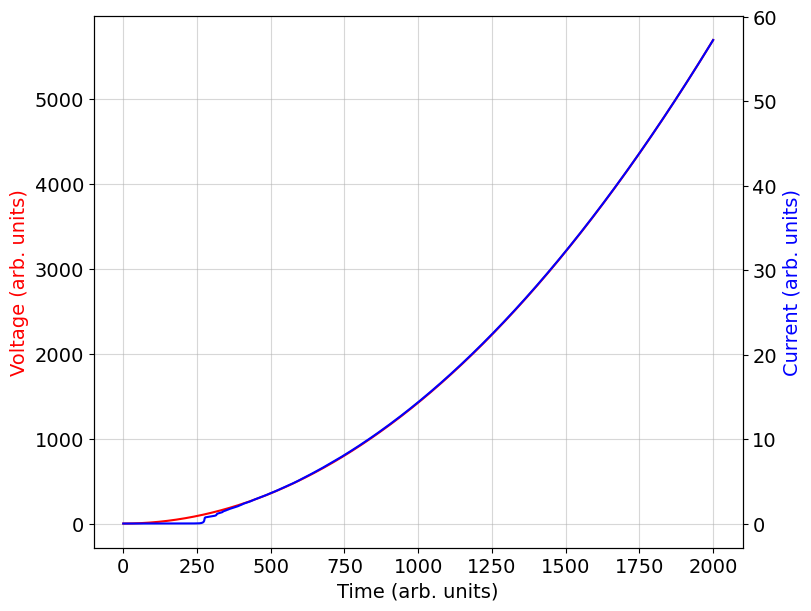

In [23]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 500
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-12, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

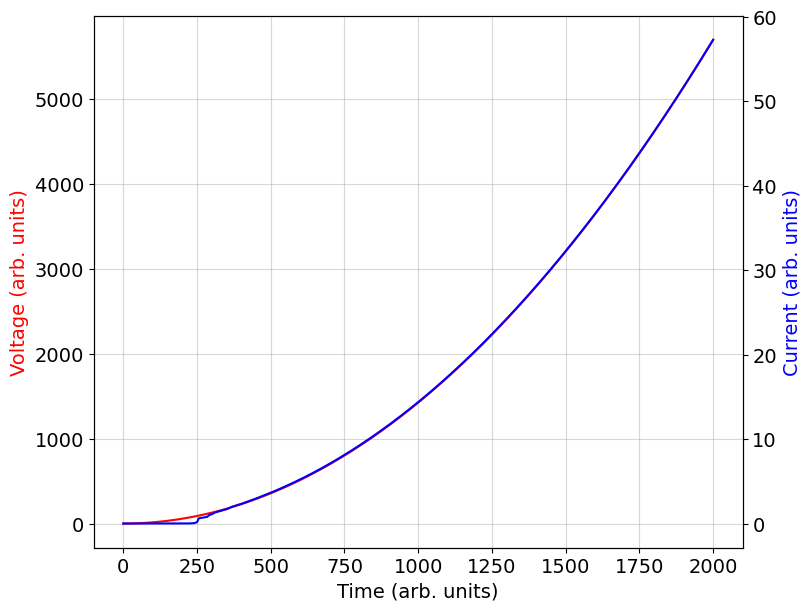

In [24]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 500
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-12, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-25-5425720d6026>:9: RuntimeWarning: overflow encountered in multiply
  return w * (1 - w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:146: RuntimeWarning: invalid value encountered in multiply
  dwdt = (V_delta / R * window_func(w)) - (w / tau)


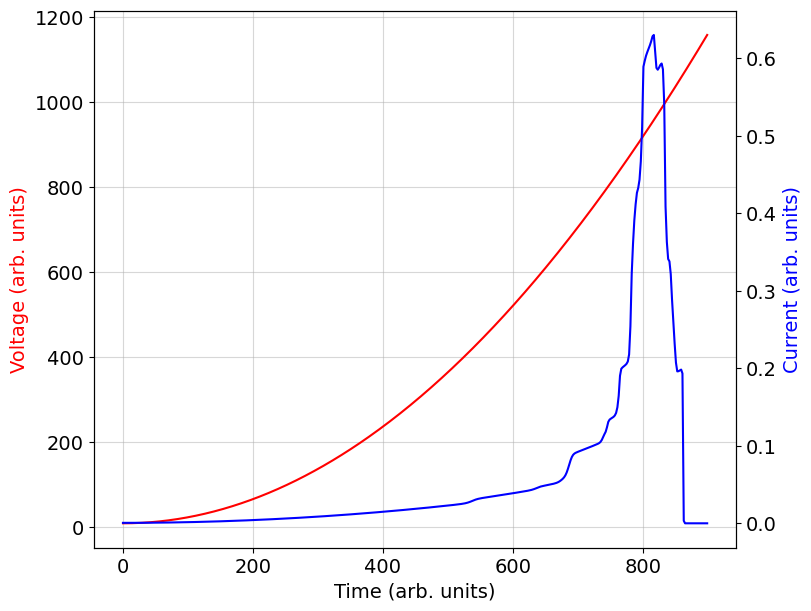

In [25]:
max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 500
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-12, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

<ipython-input-26-e76ab32cc774>:28: RuntimeWarning: overflow encountered in power
  return 1 - (2*w - 1)**(2*p)


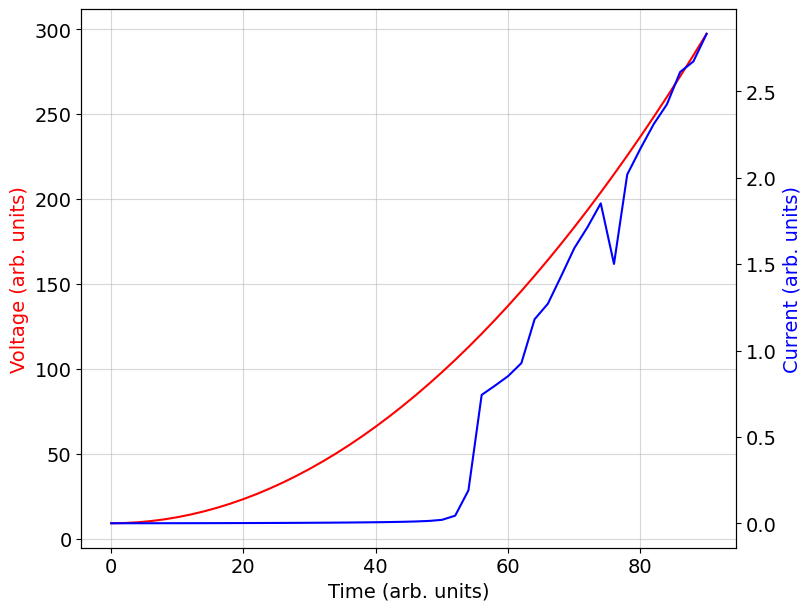

In [26]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def window_func(w):
    p = 4
    return 1 - (2*w - 1)**(2*p)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-29-8cae0a56af8b>:52: RuntimeWarning: invalid value encountered in divide
  R = V / I


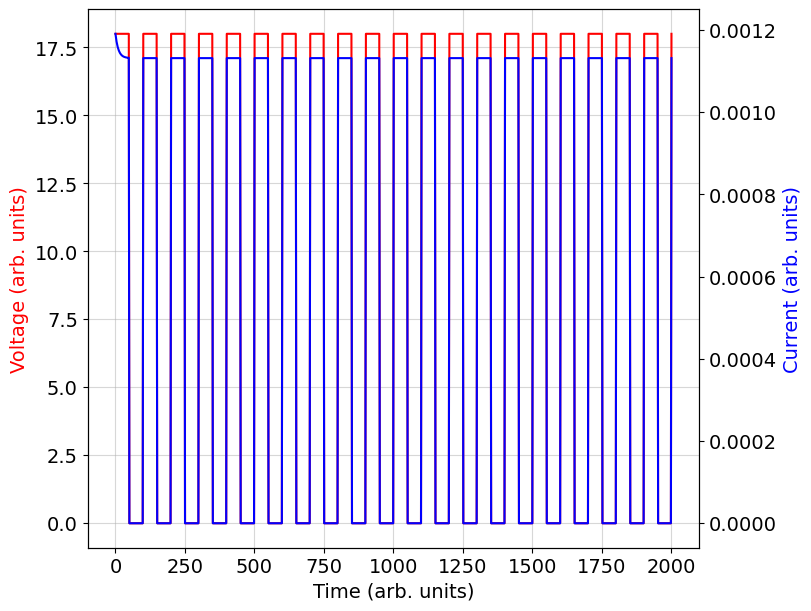

In [29]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
# def voltage_func(t):
#     V0 = 18
#     T = 100
#     f = 1 / T
#     return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    period = 1 / f
    pulse_width = period / 2
    pulse = V0 * (t % period < pulse_width)
    return pulse


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-30-e5281de5adb4>:52: RuntimeWarning: invalid value encountered in divide
  R = V / I


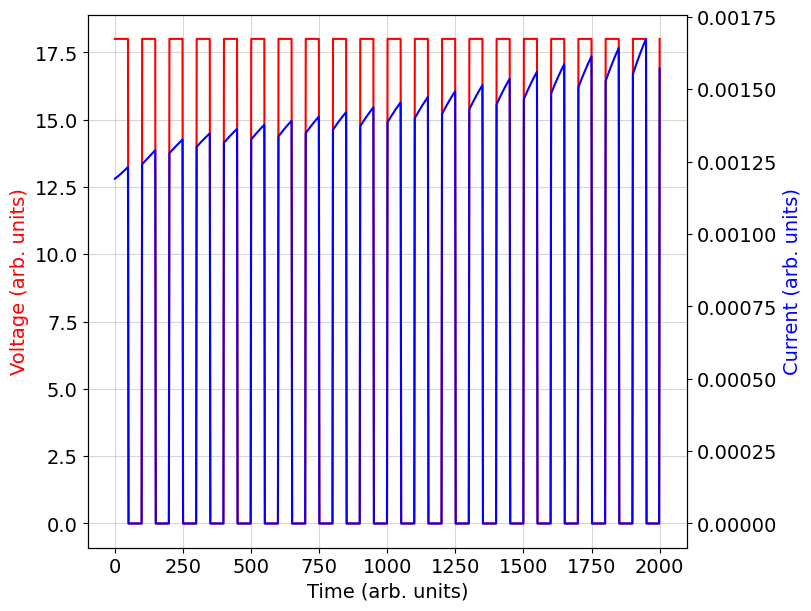

In [30]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
# def voltage_func(t):
#     V0 = 18
#     T = 100
#     f = 1 / T
#     return V0 * (math.pow(2*np.pi*f*t,2) + 1) / 2

def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    period = 1 / f
    pulse_width = period / 2
    pulse = V0 * (t % period < pulse_width)
    return pulse


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-31-e137e7bee9e2>:53: RuntimeWarning: invalid value encountered in divide
  R = V / I


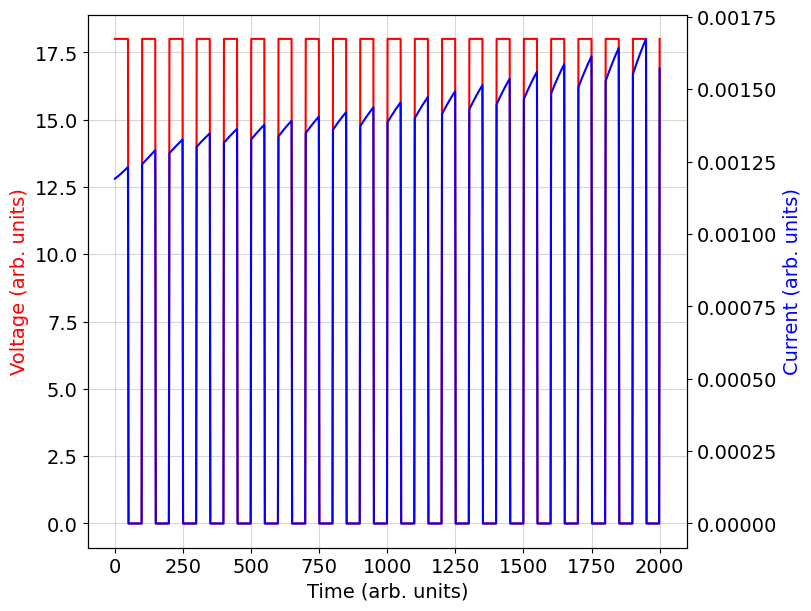

In [31]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 18
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2

# def voltage_func(t):
#     V0 = 18
#     T = 100
#     f = 1 / T
#     period = 1 / f
#     pulse_width = period / 2
#     pulse = V0 * (t % period < pulse_width)
#     return pulse


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-32-0d7998fc4d21>:44: RuntimeWarning: invalid value encountered in divide
  R = V / I


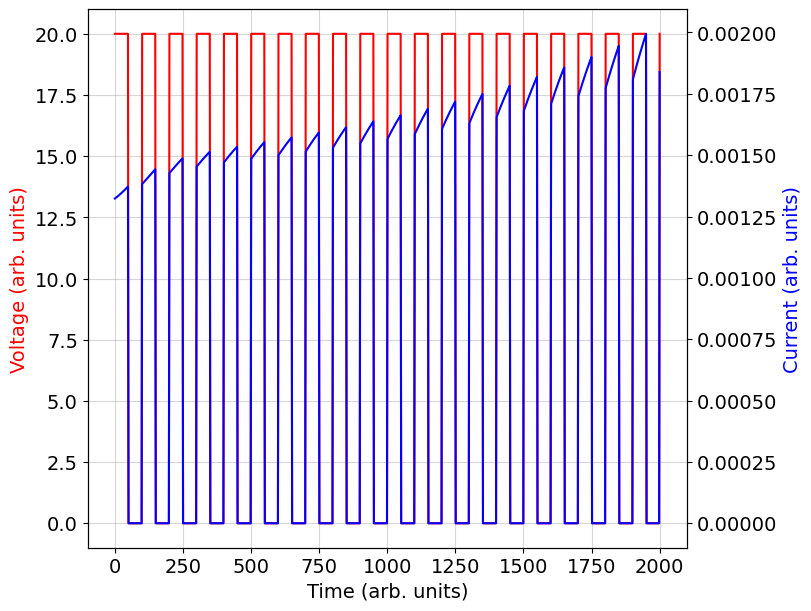

In [32]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
import math
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-35-43f49acfeb43>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


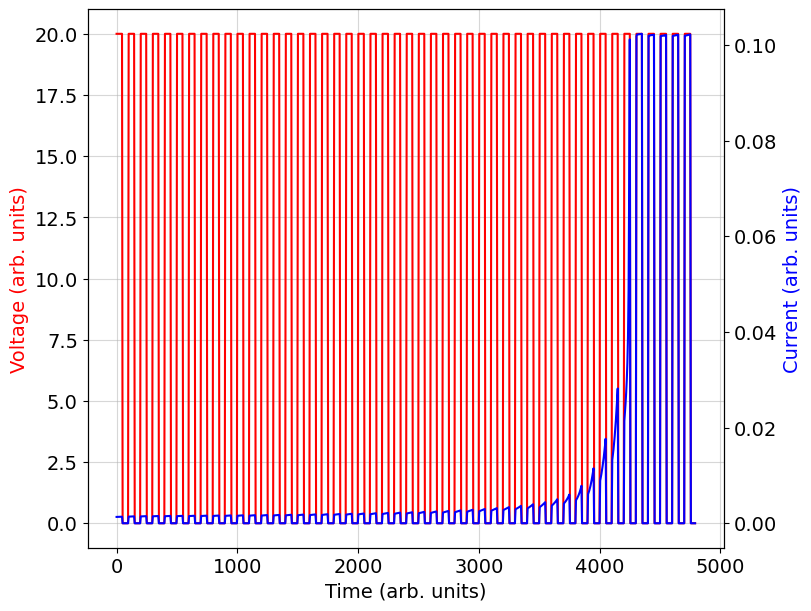

In [35]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 5000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-36-6d1997a7d45d>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


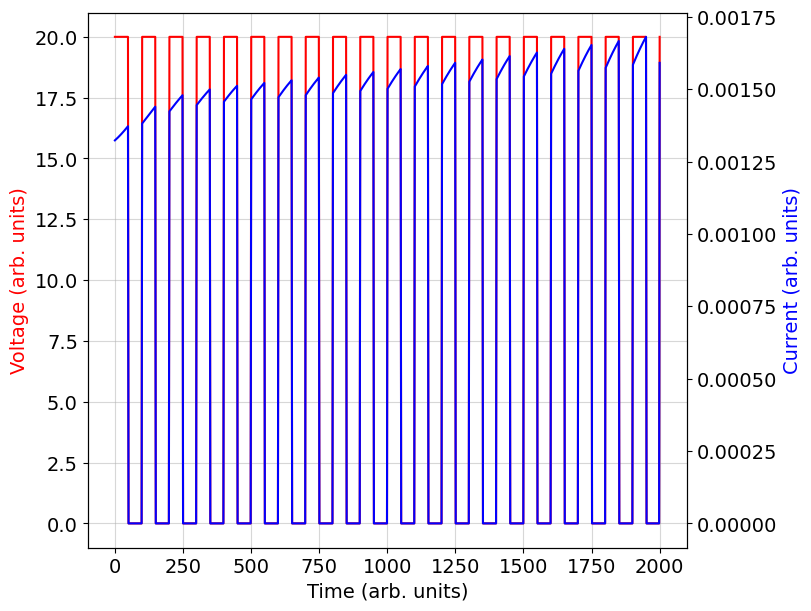

In [36]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.4, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-37-4dd04ea0821b>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


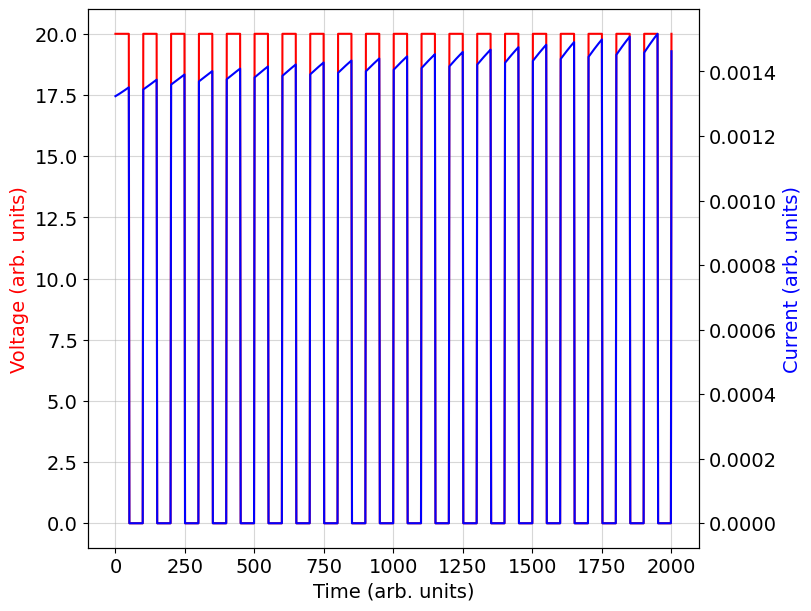

In [37]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.4, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-38-d6398c0fa1d7>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


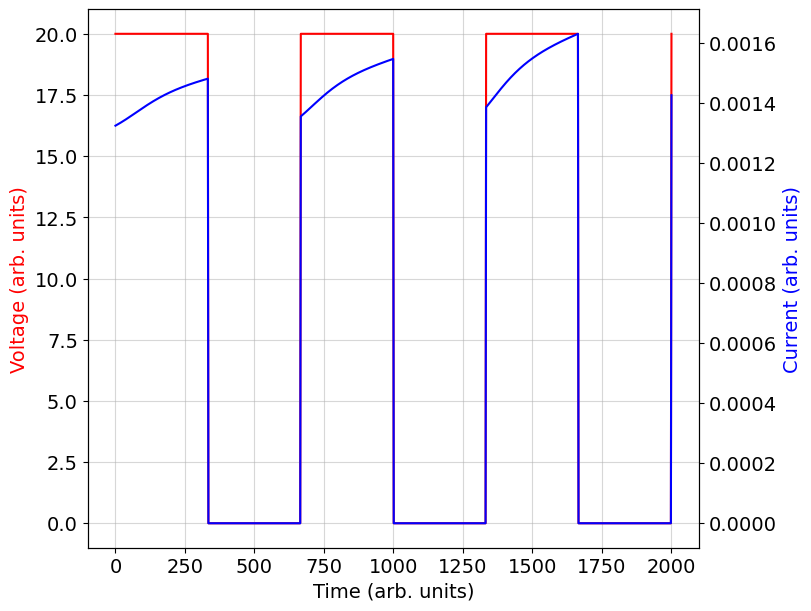

In [38]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.4, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-39-db100c00c680>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


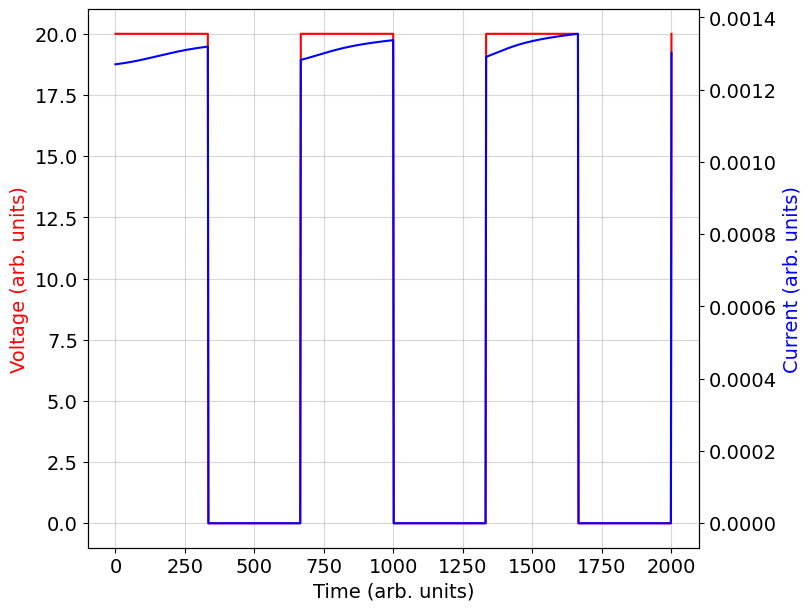

In [39]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.1, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 5, 0.01
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-41-74acdca48ec5>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


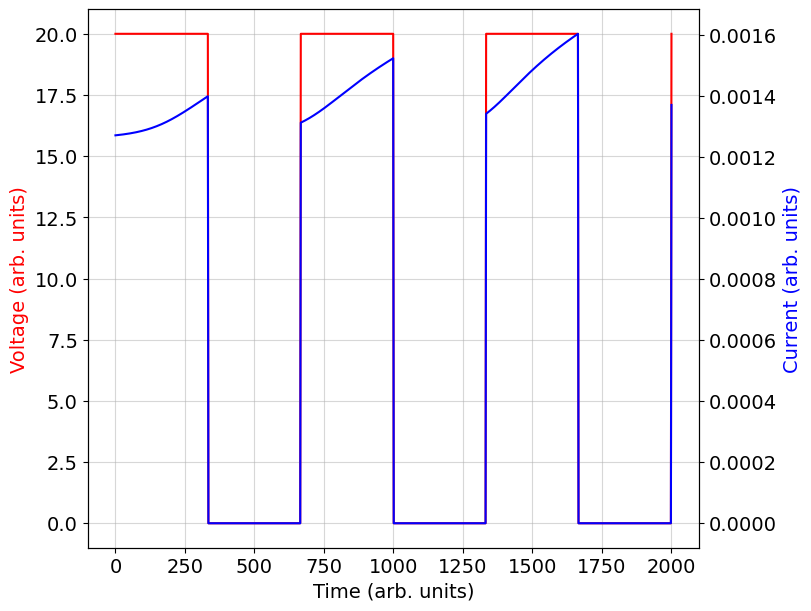

In [41]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.1, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 20, 0.01
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-43-87a66930dc8b>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


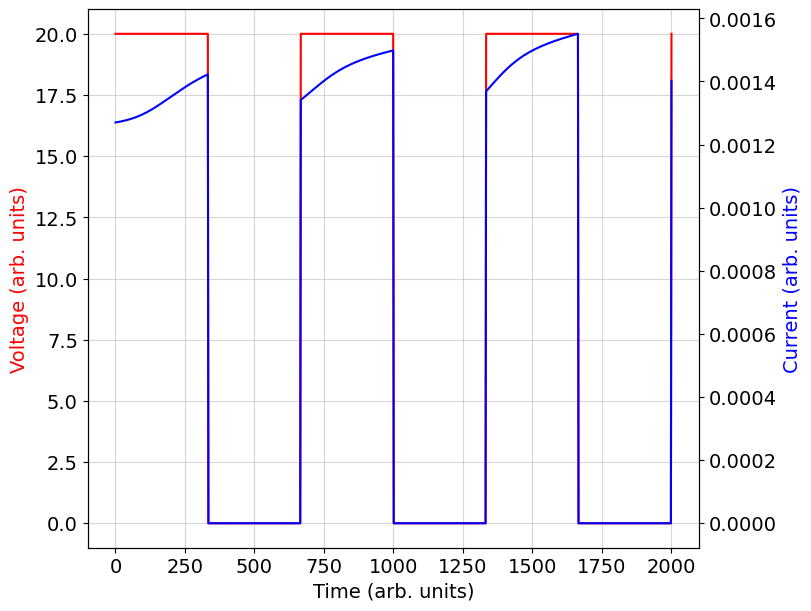

In [43]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.1, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-47-10cb45d956d7>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


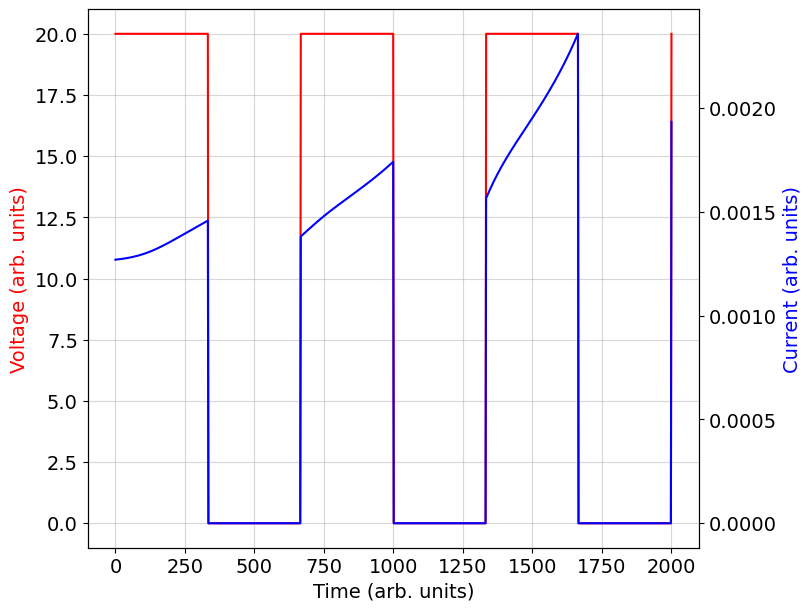

In [47]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.2, 0.1, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-50-1ae84c65c10c>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


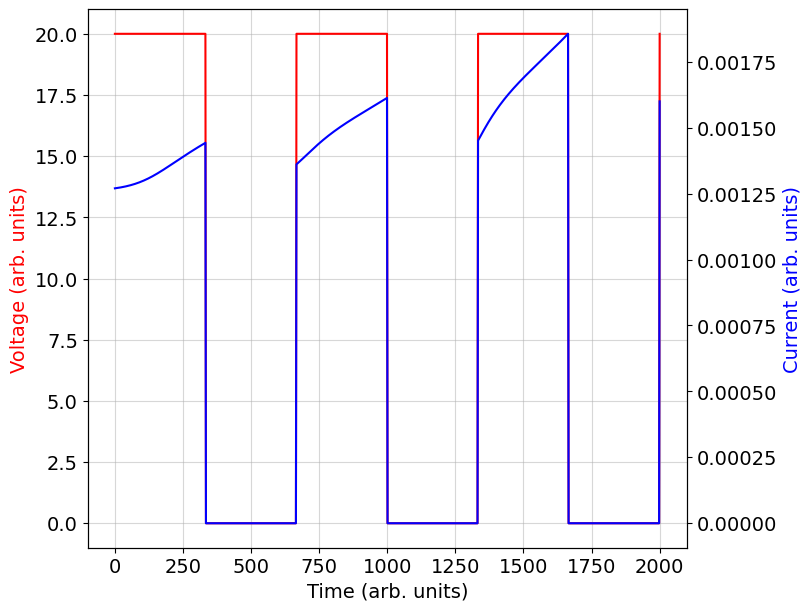

In [50]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-52-3307ff617735>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


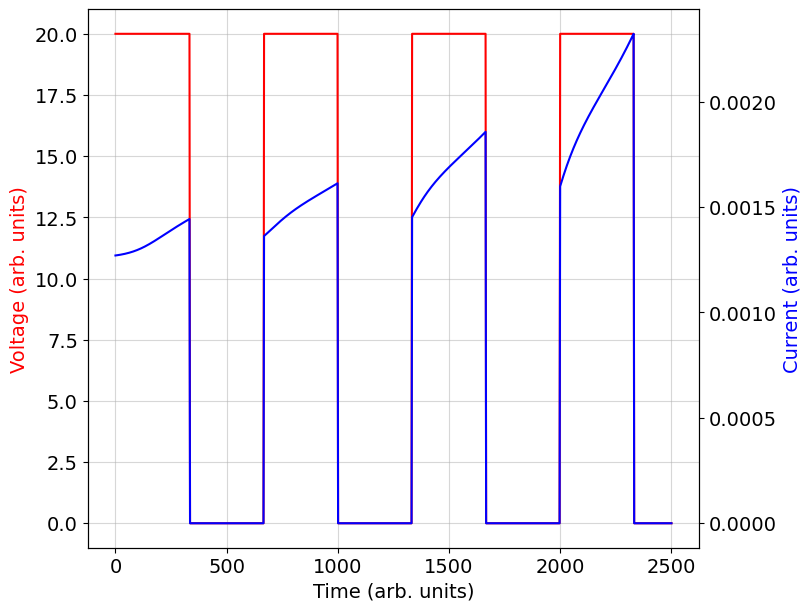

In [52]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2500
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)



# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-54-fd1d1f5ddb83>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 4.877951e-04
Bottom left -> Top right: 5.931283e-04
Top left -> Bottom right: 0.000000e+00
Top left -> Top right: 0.000000e+00


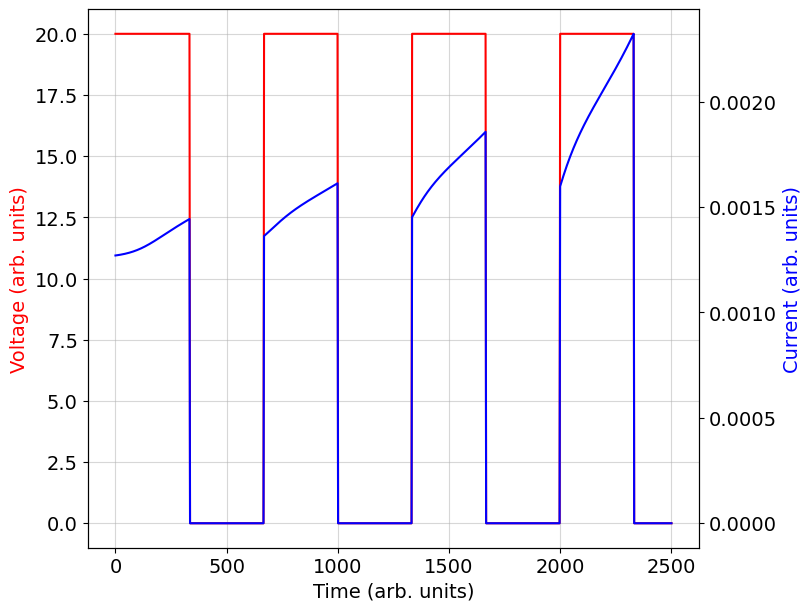

In [54]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290, density=5.5)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2500
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

In [55]:
# Before this point the values were tested with a small density. now this next test is with no limit

<ipython-input-57-33570cd596d0>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 9.360760e-02
Bottom left -> Top right: 3.189113e-02
Top left -> Bottom right: 3.078786e-02
Top left -> Top right: 1.090613e-01


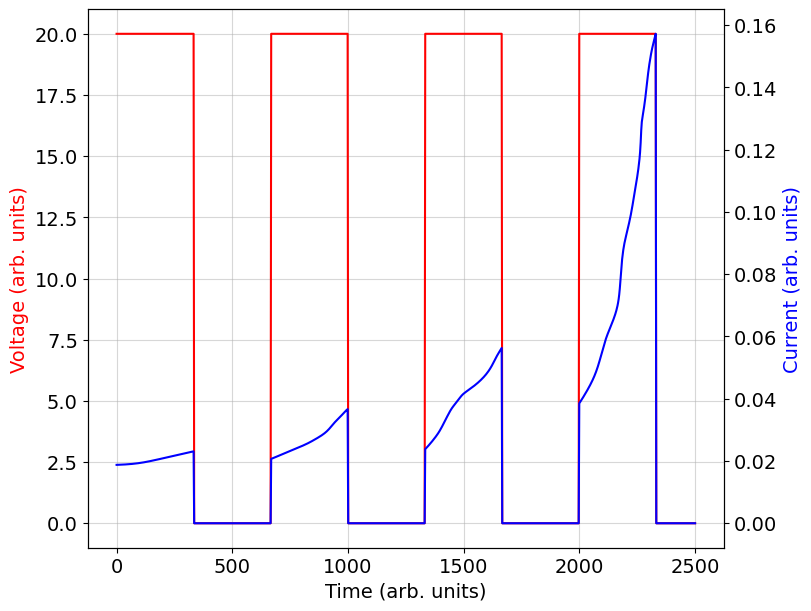

In [57]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2500
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-58-ca50ffc411f4>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.483199e-02
Bottom left -> Top right: 1.255349e-02
Top left -> Bottom right: 8.440532e-03
Top left -> Top right: 1.057028e-02


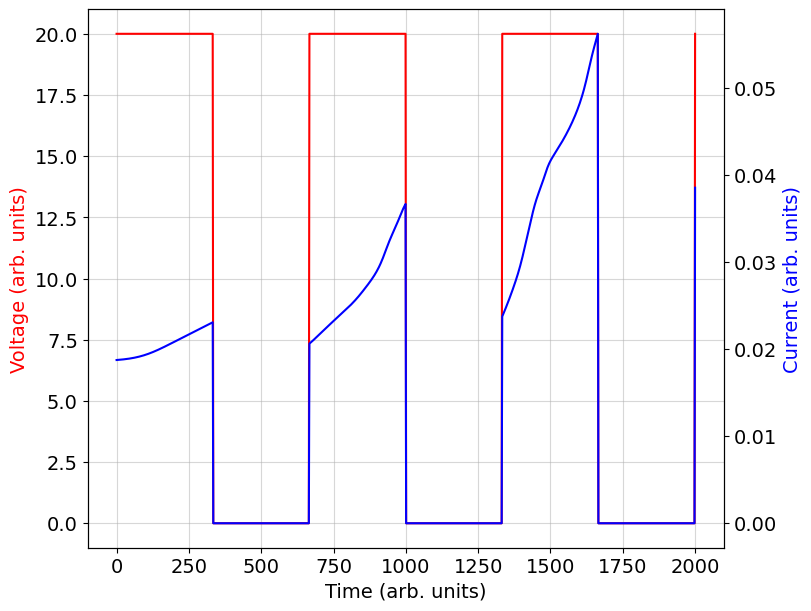

In [58]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-64-ac06644457ae>:28: RuntimeWarning: overflow encountered in multiply
  return w * (1 - w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:45: RuntimeWarning: overflow encountered in multiply
  R = w * (1 - Roff_Ron) + Roff_Ron


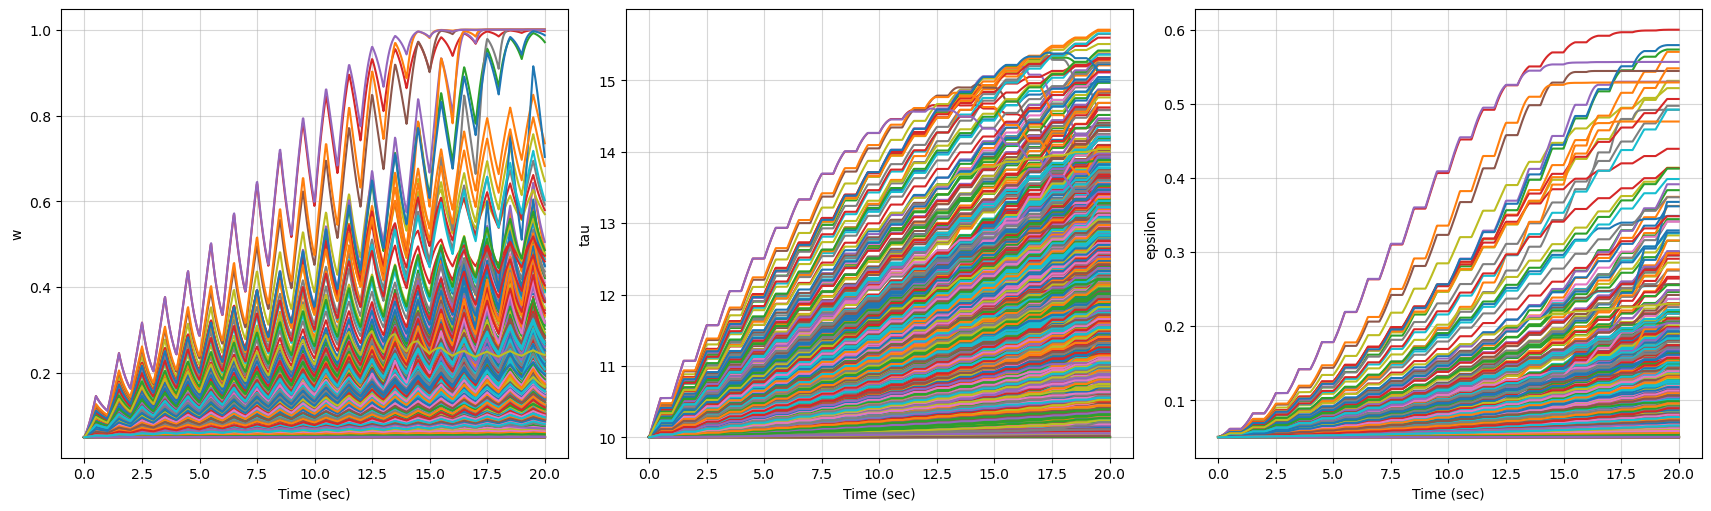

In [64]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 100
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

# V = [voltage_func(t) for t in sol.t]
# I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
# R = V / I

# font = 14
# fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

# ax1.plot(sol.t, V, "red")
# ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
# ax1.set_xlabel("Time (arb. units)", fontsize=font)
# ax1.tick_params(labelsize=font, which="both")

# ax2 = ax1.twinx()
# ax2.plot(sol.t, I, "blue")
# ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
# ax2.tick_params(labelsize=font, which="both")

# ax1.grid(alpha=0.5)

# print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
#     *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
# ))

# print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
#     *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
# ))
fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
for ax in axes:
    ax.set_xlabel("Time (sec)")
    ax.grid(alpha=0.5)

axes[0].set_ylabel("w")
axes[1].set_ylabel("tau")
axes[2].set_ylabel("epsilon")

w_list, tau_list, eps_list = np.split(sol.y, 3)
for w in w_list:
    axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
for tau in tau_list:
    axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
for eps in eps_list:
    axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

<ipython-input-65-dc2815962375>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.465778e-02
Bottom left -> Top right: 1.241542e-02
Top left -> Bottom right: 8.335749e-03
Top left -> Top right: 1.042530e-02


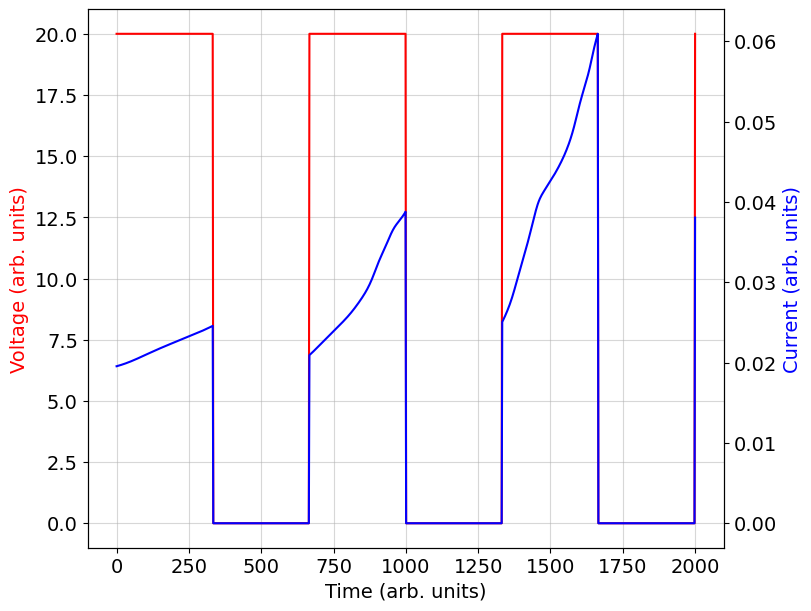

In [65]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))
# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

<ipython-input-67-39d94a1da053>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.483199e-02
Bottom left -> Top right: 1.255349e-02
Top left -> Bottom right: 8.440532e-03
Top left -> Top right: 1.057028e-02


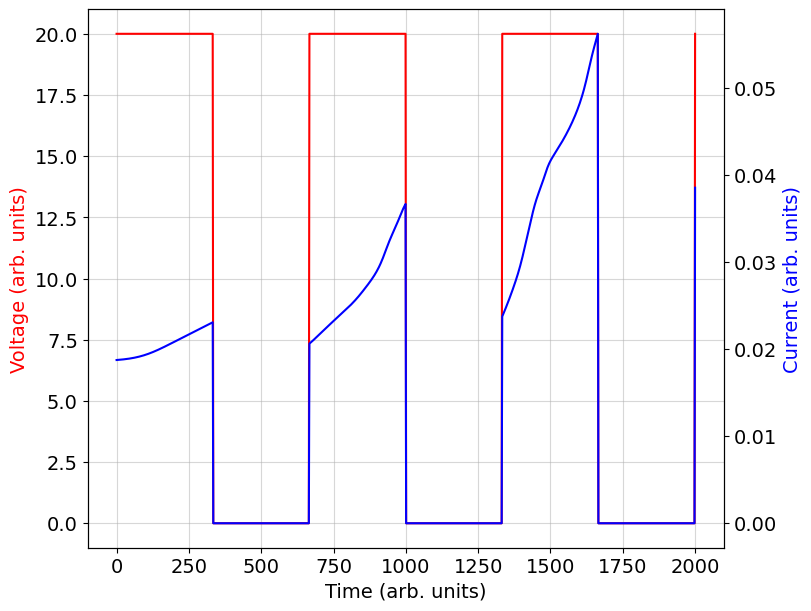

In [67]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))
# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

<ipython-input-70-975ff98c556b>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 8.118992e-03
Bottom left -> Top right: 6.198242e-03
Top left -> Bottom right: 6.697887e-03
Top left -> Top right: 6.349042e-03


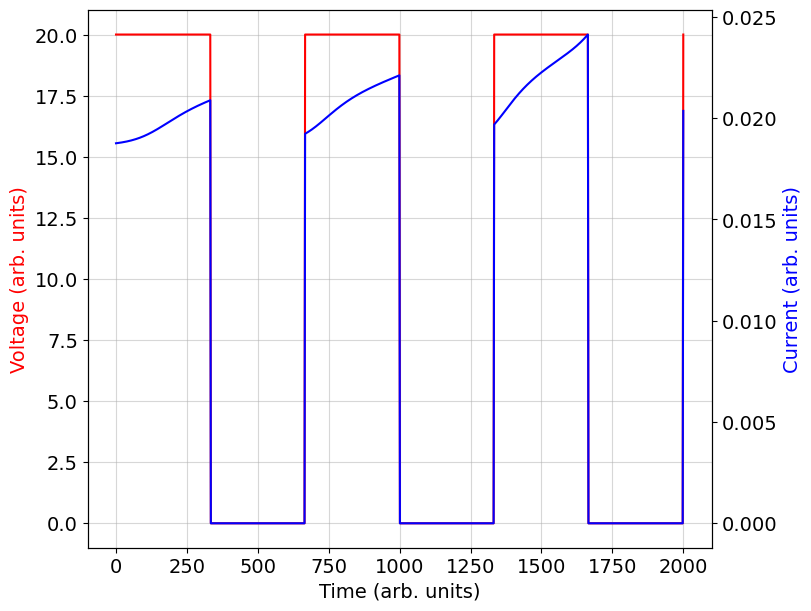

In [70]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.1, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.01
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-74-e62461bcc4e4>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 8.508529e-03
Bottom left -> Top right: 6.394312e-03
Top left -> Bottom right: 6.859408e-03
Top left -> Top right: 6.446696e-03


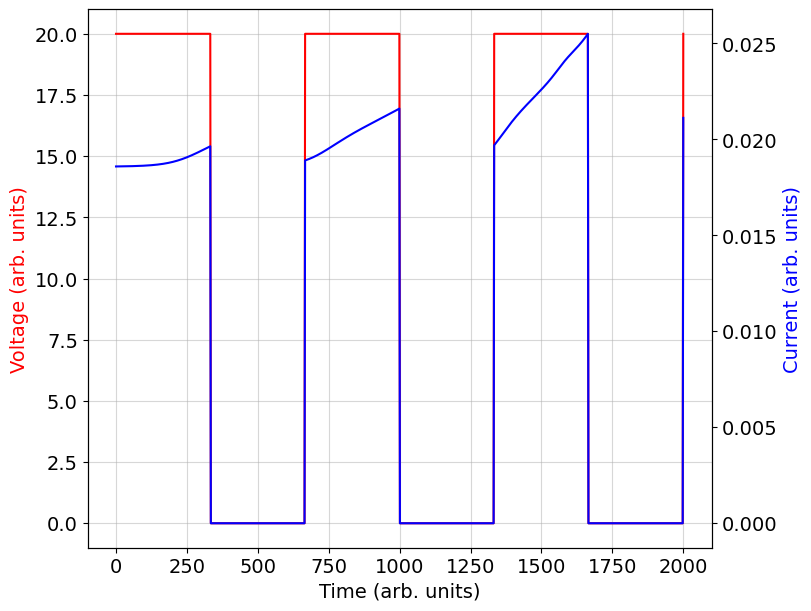

In [74]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.1, 0.5
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.001, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-75-ca50ffc411f4>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.483199e-02
Bottom left -> Top right: 1.255349e-02
Top left -> Bottom right: 8.440532e-03
Top left -> Top right: 1.057028e-02


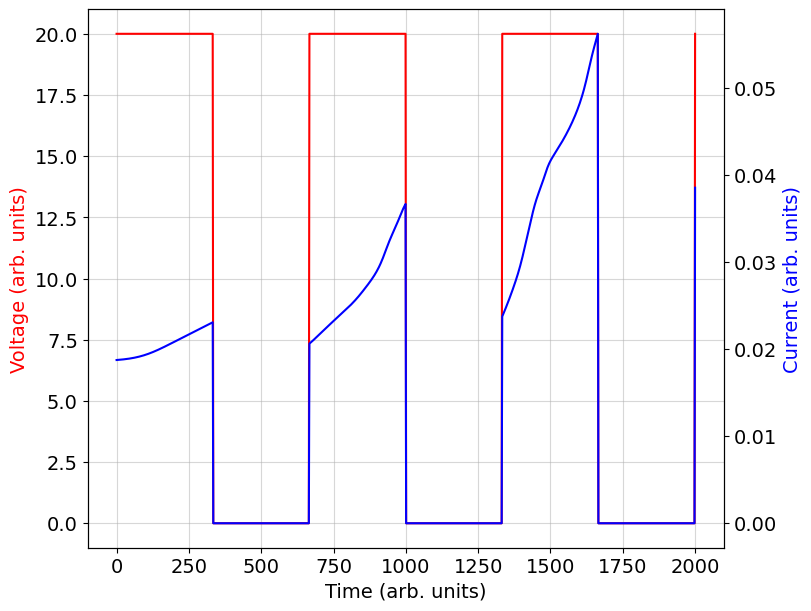

In [75]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-78-ca50ffc411f4>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.483199e-02
Bottom left -> Top right: 1.255349e-02
Top left -> Bottom right: 8.440532e-03
Top left -> Top right: 1.057028e-02


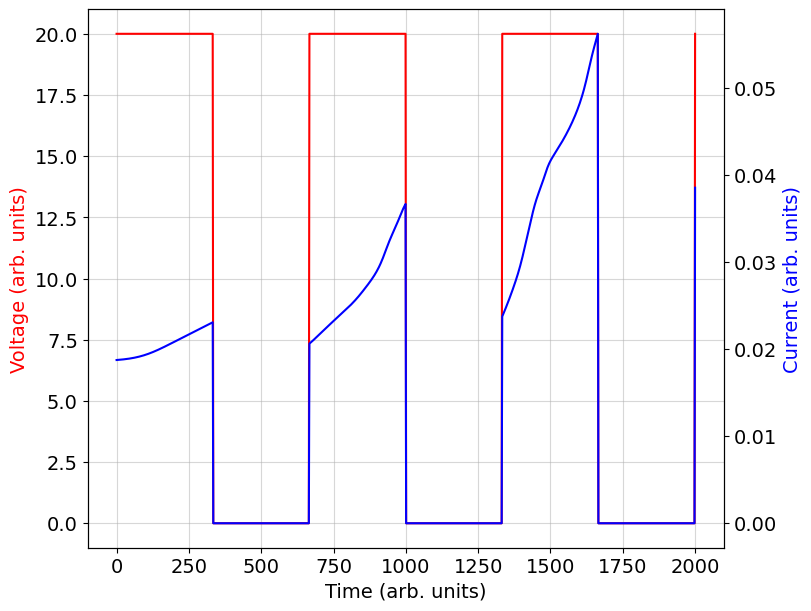

In [78]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.125, 0.3, 0.85
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-79-e8954bc8236d>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 8.017827e-03
Bottom left -> Top right: 6.139428e-03
Top left -> Bottom right: 6.624926e-03
Top left -> Top right: 6.295347e-03


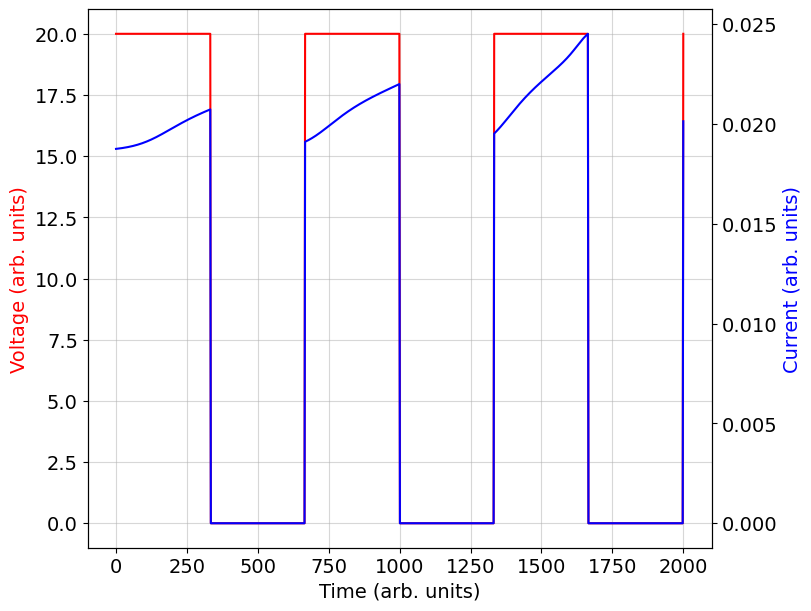

In [79]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-80-7074b7c7d2e8>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 9.980746e-01
Bottom left -> Top right: 6.039842e-01
Top left -> Bottom right: 5.617214e-01
Top left -> Top right: 8.564908e-01


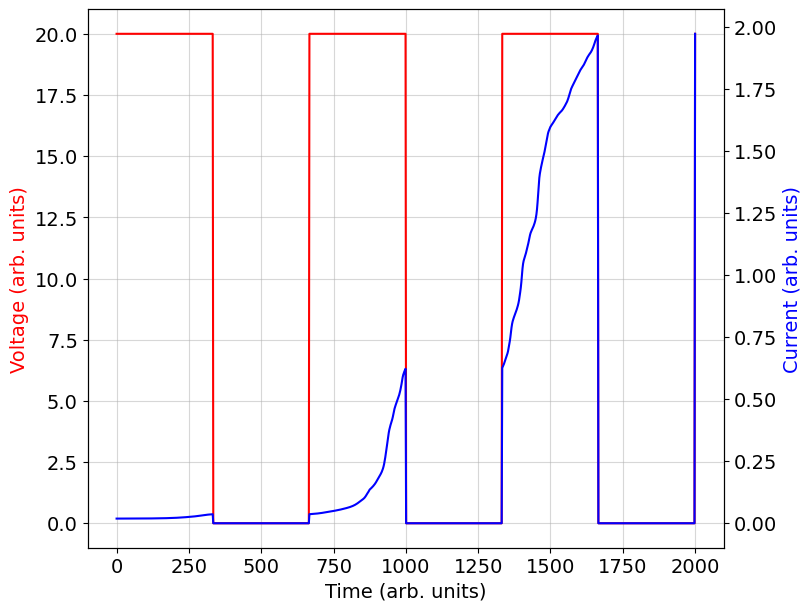

In [80]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-81-02ad3d1f2dfb>:43: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177397e-03
Top left -> Top right: 5.962984e-03


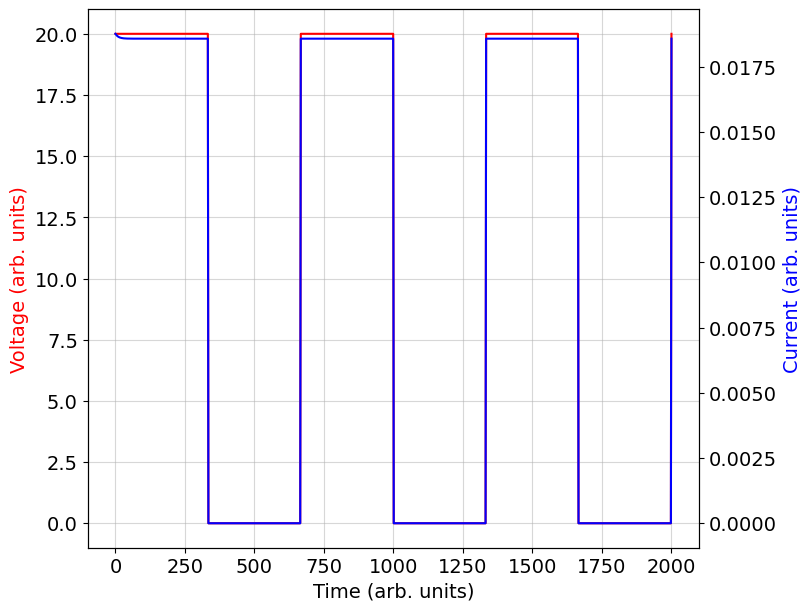

In [81]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-82-7eb42f600661>:47: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177397e-03
Top left -> Top right: 5.962984e-03


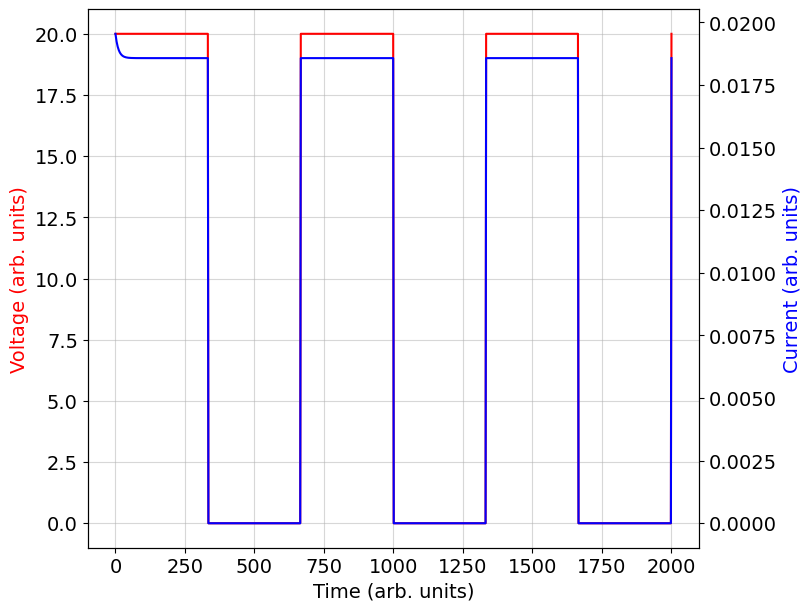

In [82]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
sigma, theta, a = 0.1, 0.5, 0.9
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.05
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

Connected to randomnwn (Python 3.8.17)

<ipython-input-1-6535b1f69dcc>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 8.017827e-03
Bottom left -> Top right: 6.139428e-03
Top left -> Bottom right: 6.624926e-03
Top left -> Top right: 6.295347e-03


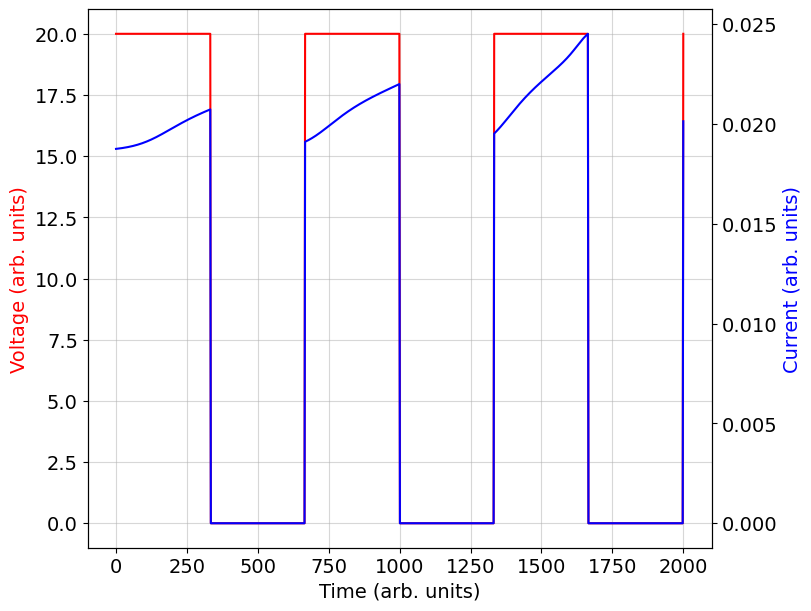

In [1]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

# sigma, theta, a = 0.1, 0.5, 0.9
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.05, 10, 0.05

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-2-6535b1f69dcc>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 8.017827e-03
Bottom left -> Top right: 6.139428e-03
Top left -> Bottom right: 6.624926e-03
Top left -> Top right: 6.295347e-03


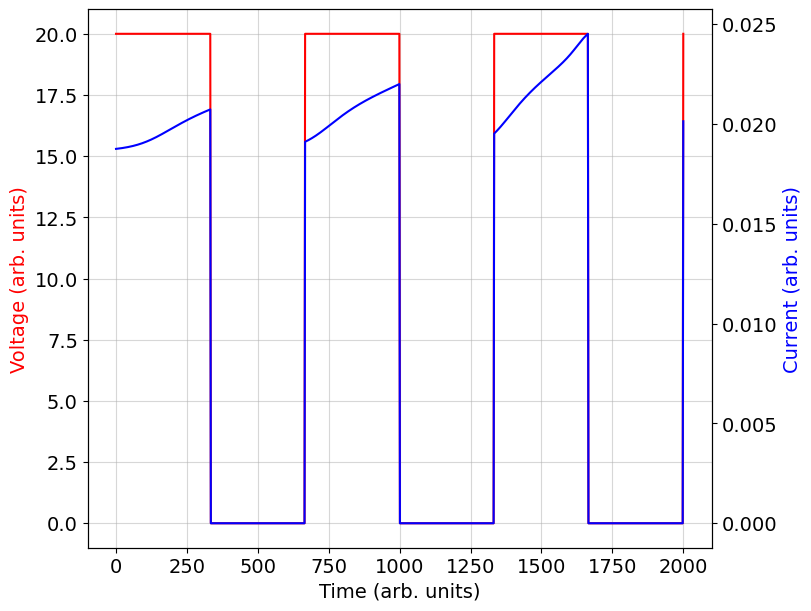

In [2]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

# sigma, theta, a = 0.1, 0.5, 0.9
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.05, 10, 0.05

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-3-c8f785dc1332>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 9.980746e-01
Bottom left -> Top right: 6.039842e-01
Top left -> Bottom right: 5.617214e-01
Top left -> Top right: 8.564908e-01


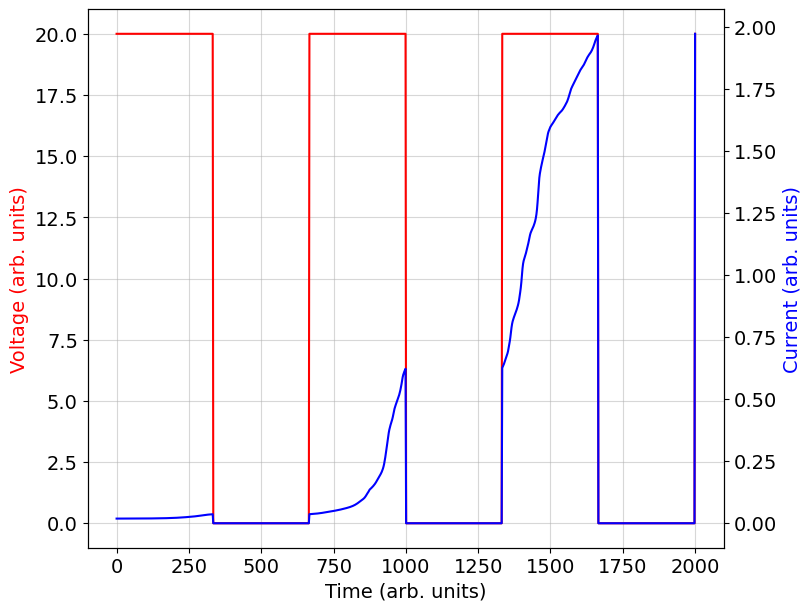

In [3]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

# sigma, theta, a = 0.1, 0.5, 0.9
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.05, 10, 0.05

sigma, theta, a = 0.05, 0.2, 1
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

No kernel connected

<ipython-input-28-63d7b5c7a048>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.122671e+00
Bottom left -> Top right: 7.736807e-01
Top left -> Bottom right: 8.104838e-01
Top left -> Top right: 9.489731e-01


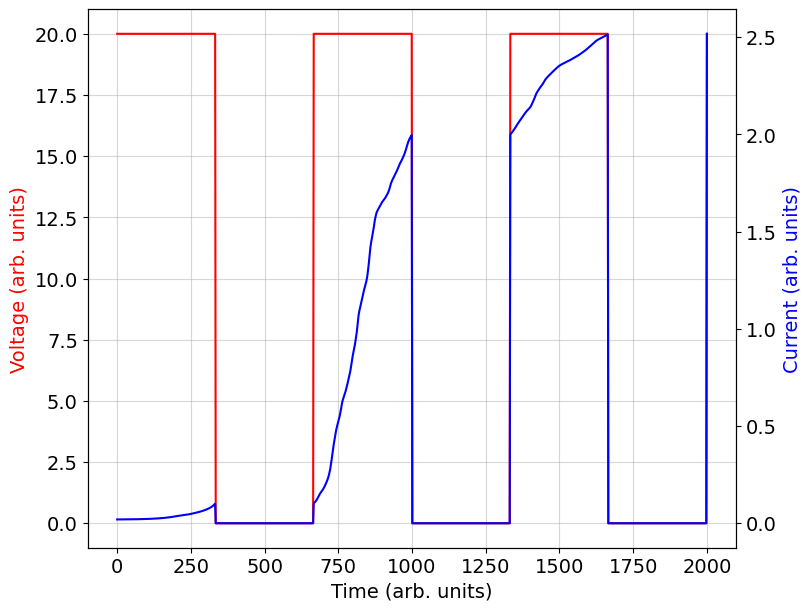

In [28]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.001

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-29-b3b67aeb7340>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.122671e+00
Bottom left -> Top right: 7.736807e-01
Top left -> Bottom right: 8.104838e-01
Top left -> Top right: 9.489731e-01


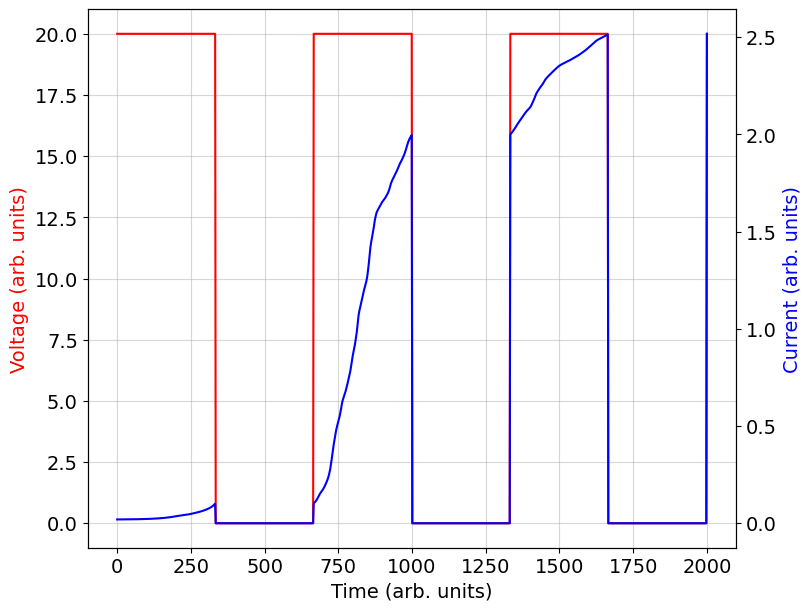

In [29]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.01

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-30-ca6082ef4e54>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.032729e-02
Bottom left -> Top right: 9.971467e-03
Top left -> Bottom right: 6.510093e-03
Top left -> Top right: 8.488612e-03


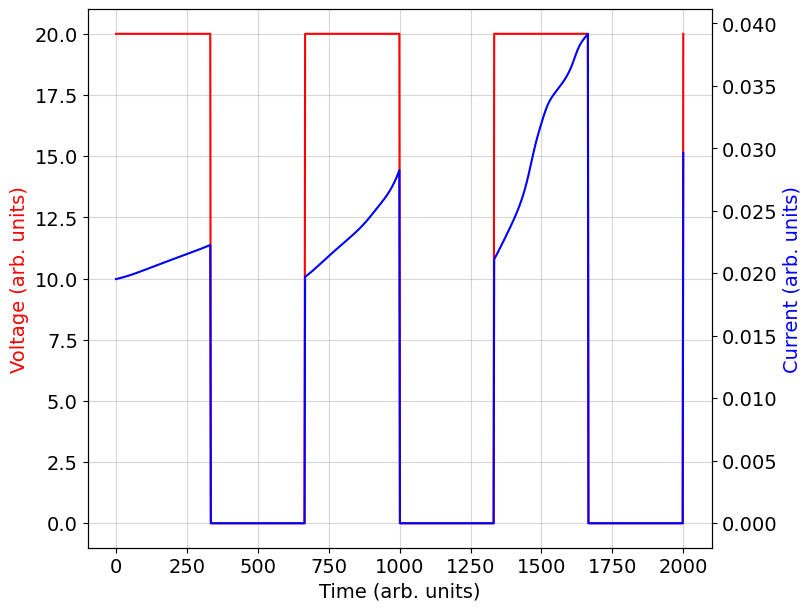

In [30]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.001

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-31-4f1a81a98179>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.028208e-02
Bottom left -> Top right: 1.075756e-02
Top left -> Bottom right: 6.367241e-03
Top left -> Top right: 9.213917e-03


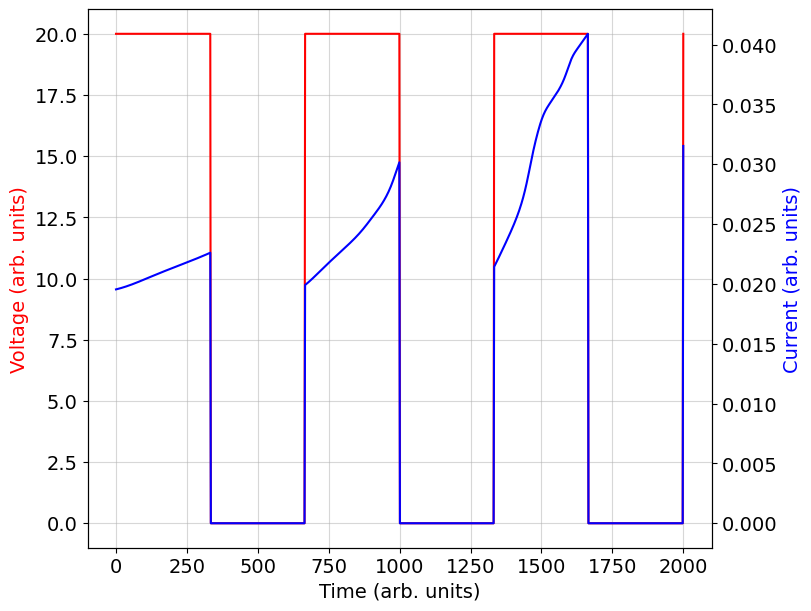

In [31]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.01

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-32-31145d279cd3>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177397e-03
Top left -> Top right: 5.962984e-03


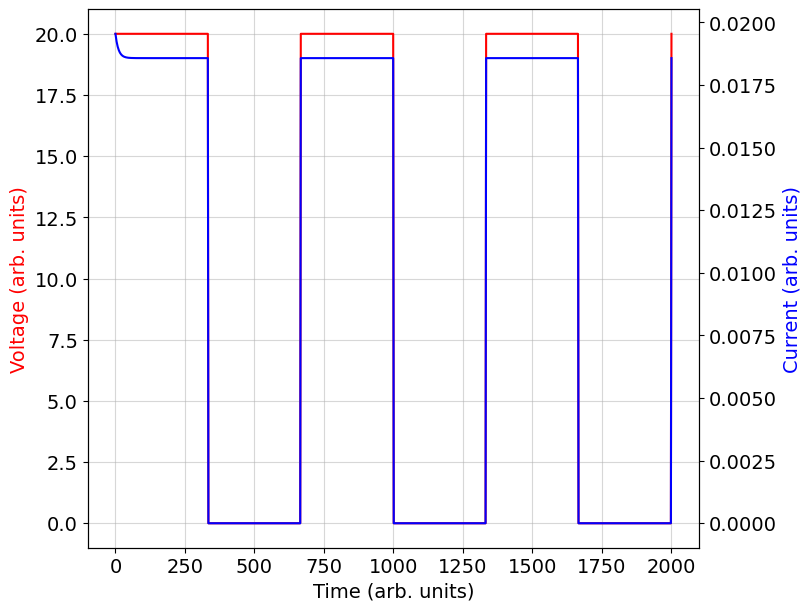

In [32]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.001

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-33-e6c166ef2ebf>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177397e-03
Top left -> Top right: 5.962984e-03


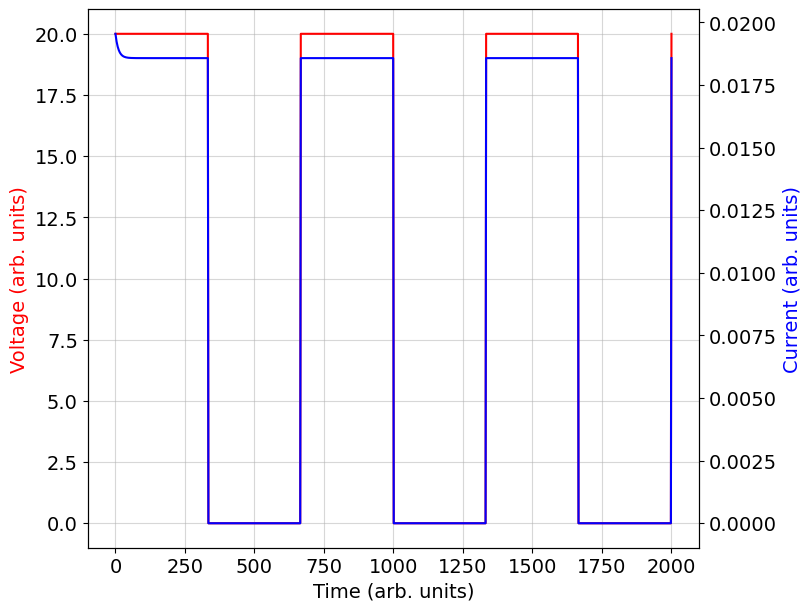

In [33]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.01

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-34-8d9385706303>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177397e-03
Top left -> Top right: 5.962984e-03


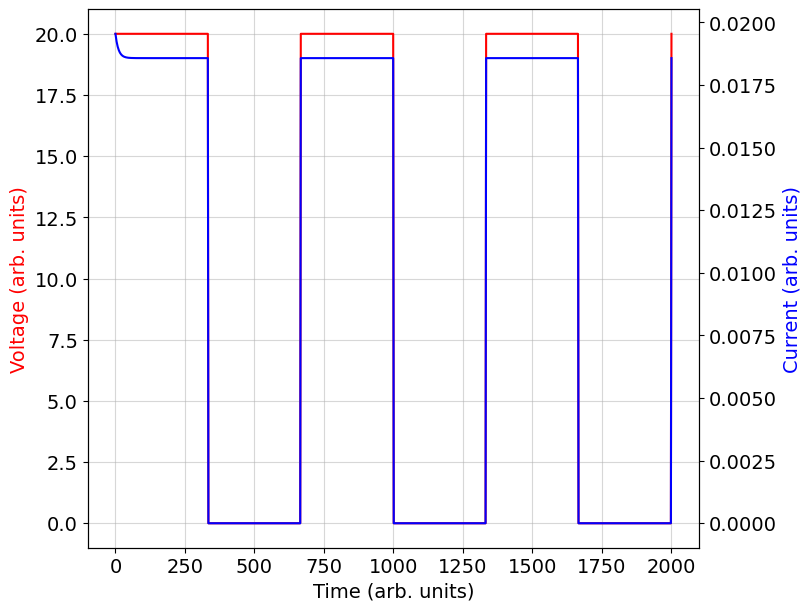

In [34]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.1

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-35-92536d281669>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.161520e+00
Bottom left -> Top right: 9.142217e-01
Top left -> Bottom right: 9.881545e-01
Top left -> Top right: 9.540836e-01


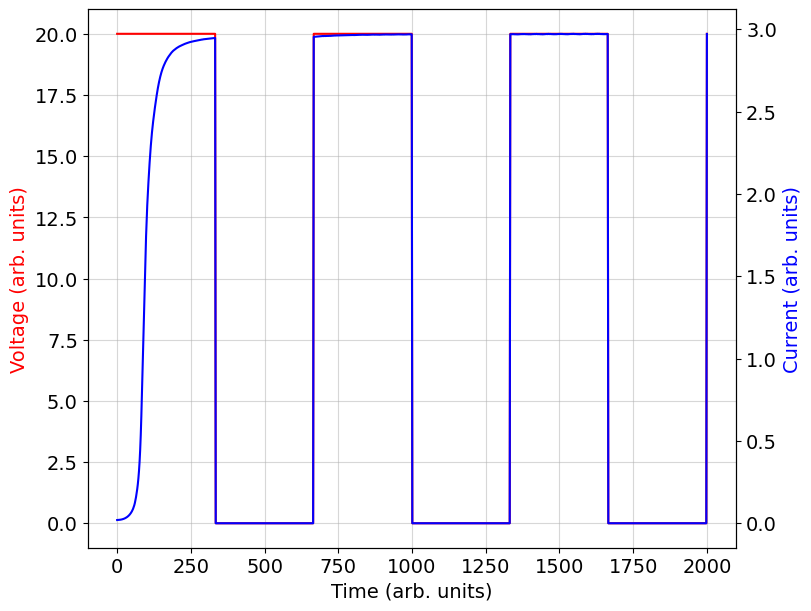

In [35]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 1

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-36-eee6f4b1df06>:28: RuntimeWarning: overflow encountered in multiply
  return w * (1 - w)
<ipython-input-36-eee6f4b1df06>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.034234e-02
Bottom left -> Top right: 9.863011e-03
Top left -> Bottom right: 6.536167e-03
Top left -> Top right: 8.389807e-03


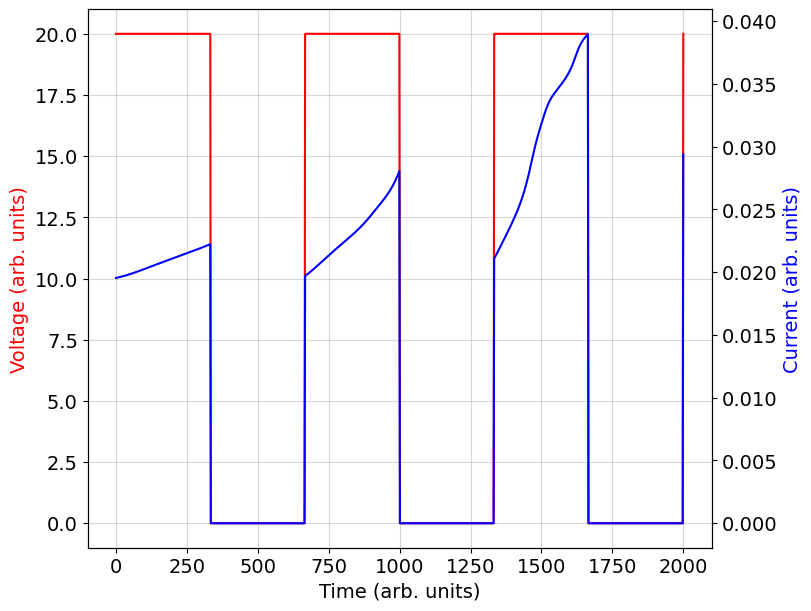

In [36]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-37-47ed861ba0ed>:28: RuntimeWarning: overflow encountered in multiply
  return w * (1 - w)
<ipython-input-37-47ed861ba0ed>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.164334e+00
Bottom left -> Top right: 8.989486e-01
Top left -> Bottom right: 9.711925e-01
Top left -> Top right: 9.573020e-01


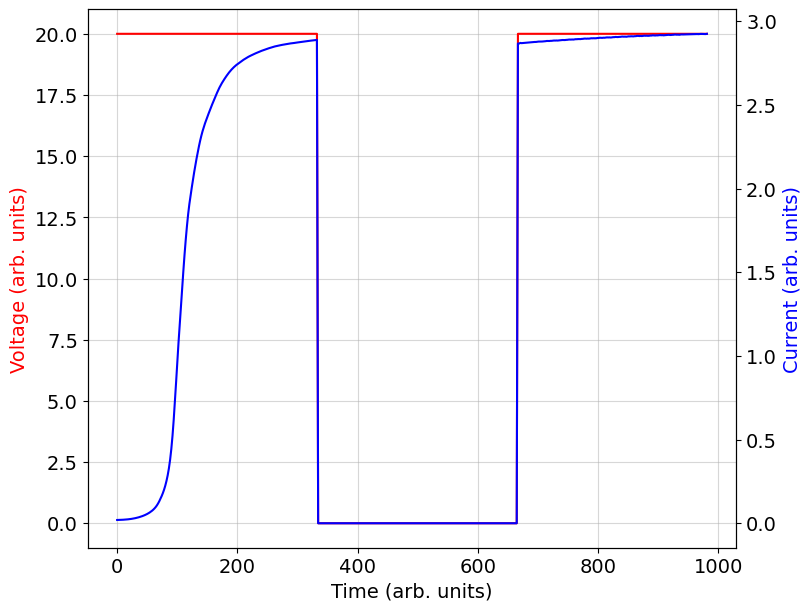

In [37]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.9

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-38-5e156ff868a8>:28: RuntimeWarning: overflow encountered in multiply
  return w * (1 - w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\scipy\integrate\_ivp\rk.py:63: RuntimeWarning: overflow encountered in multiply
  dy = np.dot(K[:s].T, a[:s]) * h
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:45: RuntimeWarning: overflow encountered in multiply
  R = w * (1 - Roff_Ron) + Roff_Ron
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:201: RuntimeWarning: invalid value encountered in subtract
  dw_dt = (l - ((w - epsilon) / tau)) * window_func(w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\randomnwn\_models.py:202: RuntimeWarning: invalid value encountered in multiply
  dtau_dt = theta * l * (a - w)
c:\Users\Symasc\anaconda3\envs\randomnwn\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:276: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", 

Bottom left -> Bottom right: 9.923600e-01
Bottom left -> Top right: 5.591222e-01
Top left -> Bottom right: 5.502279e-01
Top left -> Top right: 8.596003e-01


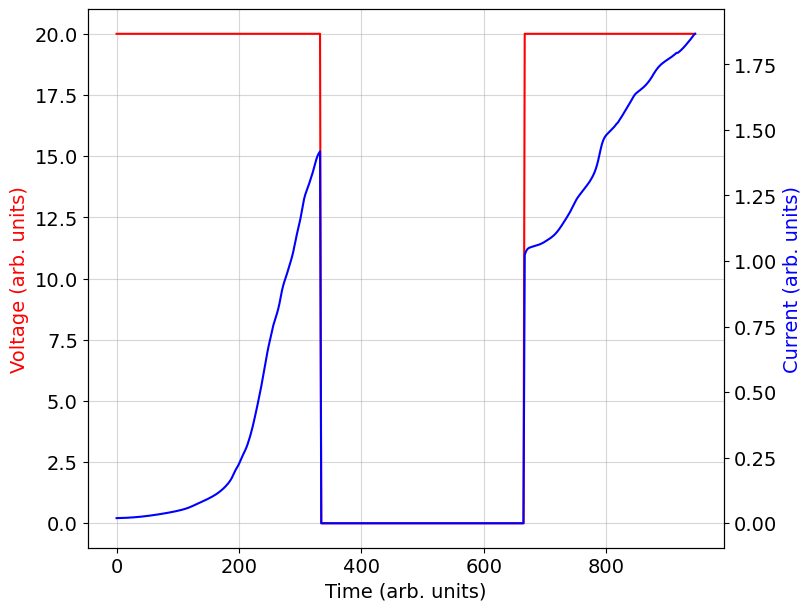

In [38]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.5 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-39-ab53c24cbce4>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.088724e+00
Bottom left -> Top right: 6.920311e-01
Top left -> Bottom right: 7.279741e-01
Top left -> Top right: 9.349236e-01


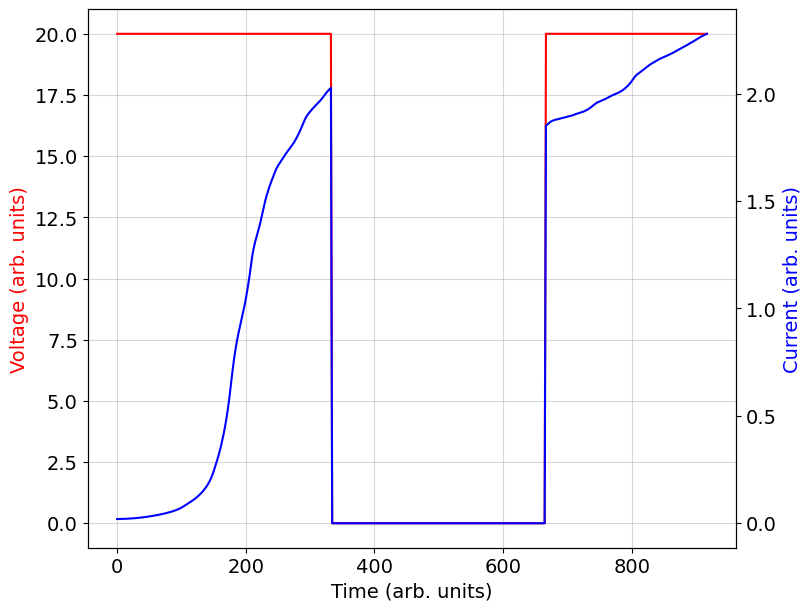

In [39]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.1, 0.5, 0.8
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.05, 10, 0.6 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

No kernel connected

<ipython-input-1-e574216ab983>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 3.317942e-02
Bottom left -> Top right: 2.582872e-02
Top left -> Bottom right: 8.695846e-03
Top left -> Top right: 1.749740e-02


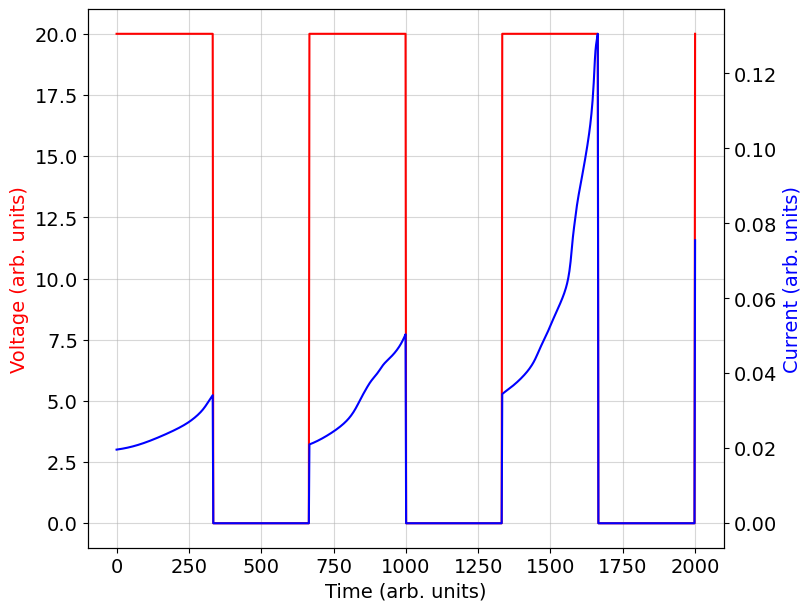

In [1]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.055, 0.55, 0.75
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.055, 20, 0.055 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-2-9501fbe1dc36>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.247824e-02
Bottom left -> Top right: 1.280479e-02
Top left -> Bottom right: 6.422463e-03
Top left -> Top right: 9.671730e-03


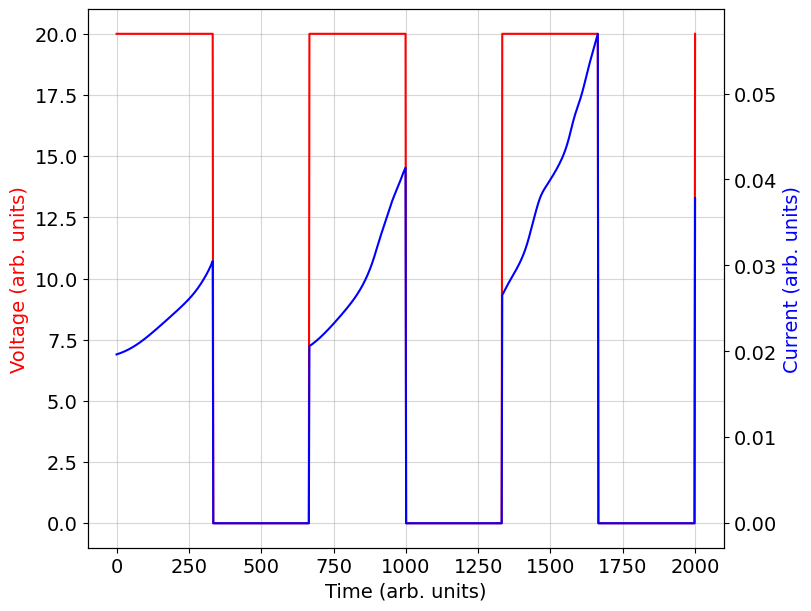

In [2]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.03, 0.01, 0.75
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.055, 20, 0.055 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "chen")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-4-00f449cf88c0>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 1.125835e+00
Bottom left -> Top right: 7.844152e-01
Top left -> Bottom right: 8.172664e-01
Top left -> Top right: 9.510532e-01


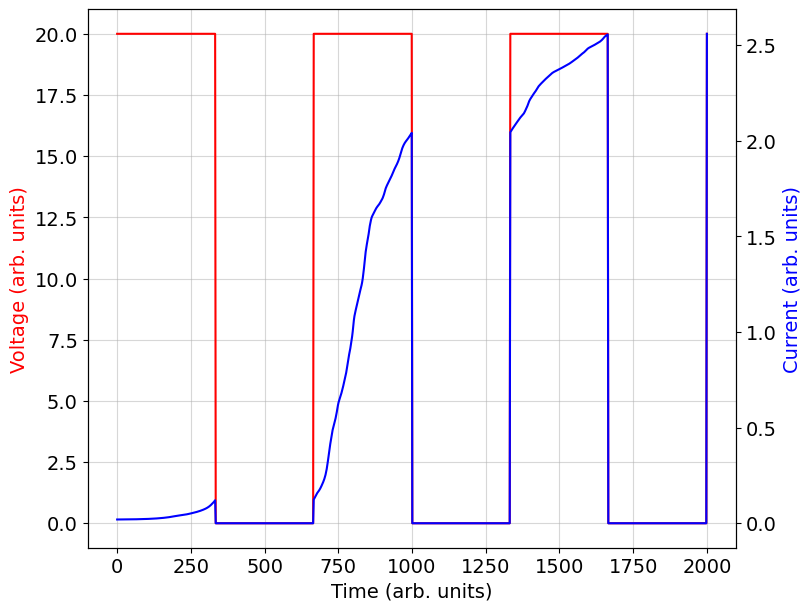

In [4]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.03, 0.01, 0.75
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.055, 20, 0.055 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "default")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():

<ipython-input-5-4807af4dae50>:48: RuntimeWarning: invalid value encountered in divide
  R = V / I


Bottom left -> Bottom right: 7.259513e-03
Bottom left -> Top right: 5.715129e-03
Top left -> Bottom right: 6.177398e-03
Top left -> Top right: 5.962984e-03


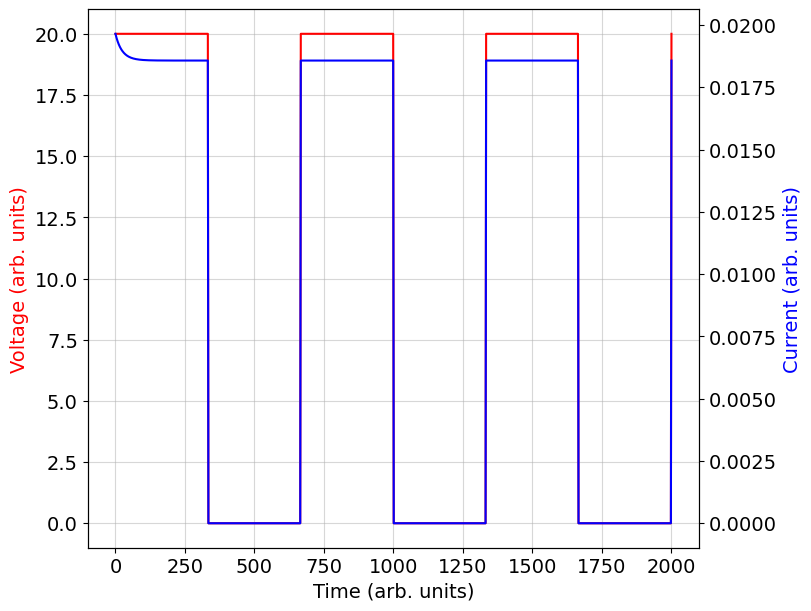

In [5]:
import randomnwn as rnwn
import matplotlib as plt
import numpy as np
from scipy import signal
from randomnwn import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

units = get_units()
#from examples.monitor import Runtime

NWN = rnwn.create_NWN(seed=4290)
#NWN = rnwn.create_NWN(seed=5)

bottom_l, top_l, bottom_r, top_r = add_electrodes(
    NWN, ["left", 2, 1, [-0.5, 0.5]], ["right", 2, 1, [-0.5, 0.5]])

max_time = 2000
def voltage_func(t):
    V0 = 20
    T = 666
    f = 1 / T
    return V0 * (signal.square(2*np.pi*f*t) + 1) / 2


def window_func(w):
    return w * (1 - w)

sigma, theta, a = 0.03, 0.01, 0.75
set_chen_params(NWN, sigma, theta, a) 

w0, tau0, epi0 = 0.055, 20, 0.055 

# sigma, theta, a = 0.05, 0.2, 1
# set_chen_params(NWN, sigma, theta, a) 

# w0, tau0, epi0 = 0.01, 10, 0.001
set_state_variables(NWN, w0, tau0, epi0)

t_eval = np.linspace(0, max_time, 1000)

sol, edge_list = solve_evolution(
        NWN, t_eval, [bottom_l, top_l], [bottom_r, top_r], voltage_func, window_func, 1e-7, "decay")

V = [voltage_func(t) for t in sol.t]
I = get_evolution_current(NWN, sol, edge_list, bottom_l, top_r, voltage_func, scaled=True)
R = V / I

font = 14
fig, ax1 = plt.subplots(figsize=(8, 6), constrained_layout=True)

ax1.plot(sol.t, V, "red")
ax1.set_ylabel("Voltage (arb. units)", color="red", fontsize=font)
ax1.set_xlabel("Time (arb. units)", fontsize=font)
ax1.tick_params(labelsize=font, which="both")

ax2 = ax1.twinx()
ax2.plot(sol.t, I, "blue")
ax2.set_ylabel("Current (arb. units)", color="blue", fontsize=font)
ax2.tick_params(labelsize=font, which="both")

ax1.grid(alpha=0.5)

print("Bottom left -> Bottom right: {:e}\nBottom left -> Top right: {:e}".format(
    *solve_drain_current(NWN, bottom_l, [bottom_r, top_r], 10.0, scaled=True)
))

print("Top left -> Bottom right: {:e}\nTop left -> Top right: {:e}".format(
    *solve_drain_current(NWN, top_l, [bottom_r, top_r], 10.0, scaled=True)
))

# fig, axes = plt.subplots(1, 3, figsize=(17, 5), constrained_layout=True)
# for ax in axes:
#     ax.set_xlabel("Time (sec)")
#     ax.grid(alpha=0.5)

# axes[0].set_ylabel("w")
# axes[1].set_ylabel("tau")
# axes[2].set_ylabel("epsilon")

# w_list, tau_list, eps_list = np.split(sol.y, 3)
# for w in w_list:
#     axes[0].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, w)
# for tau in tau_list:
#     axes[1].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, tau)
# for eps in eps_list:
#     axes[2].plot(sol.t * NWN.graph["units"]["t0"] * 1e-6, eps)

#with Runtime():